# Providing a Direction to Solve Child Malnutrition in Cambodia with Statistics

![](https://www.unicef.org/sites/default/files/styles/hero_extended/public/UN074047.jpg?itok=XR3CrGTJ)

# Contents

1. **Providing a Direction to Solve Child Malnutrition in Cambodia with Statistics**
2. **Understanding the Datasets**
3. **Preparing the Dataframe**
4. **Showing the Status of Countries in terms of Child Nutrition**
5. **Data Cleaning**
6. **Data Visualization (EDA)**
7. **Observation:**
8. **Model 1: OLS Regression (witt Constant)**
9. **Model 2: OLS Regression (without Constant)**
10. **Model 3**
11. **Random Forest Regression**
12. **Ridge Regression**
13. **Lasso Regression**
14. **Linear Boosting Regression**
15. **Support Vector Regression**
16. **Conclusion**

# Understanding the Datasets

The datasets used here have been collected from various reliable sources like: WHO, World Bank, UNICEF and Global Data Lab. Then it was uploaded to Kaggle for the completion of this project

* **Percentage-of-underweight-children-data:** Percentage of children aged 5 years or below who are underweight by country.

* **Prevalence of Underweight among Female Adults (Age Standardized Estimate):** Percentage of female adults whos BMI is less than 18.

* **GDP per capita (constant 2015 US$):** GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2015 U.S. dollars.

* **Domestic general government health expenditure (percent of GDP):** Public expenditure on health from domestic sources as a share of the economy as measured by GDP.

* **Maternal mortality ratio (modeled estimate, per 100,000 live births):** Maternal mortality ratio is the number of women who die from pregnancy-related causes while pregnant or within 42 days of pregnancy termination per 100,000 live births. The data are estimated with a regression model using information on the proportion of maternal deaths among non-AIDS deaths in women ages 15-49, fertility, birth attendants, and GDP measured using purchasing power parities (PPPs).

* **Mean-age-at-first-birth-of-women-aged-20-50-data:** Average age at which women of age 20-50 years have their first child.

* **School enrollment, secondary, female (percent gross):** Gross enrollment ratio is the ratio of total enrollment, regardless of age, to the population of the age group that officially corresponds to the level of education shown. Secondary education completes the provision of basic education that began at the primary level, and aims at laying the foundations for lifelong learning and human development, by offering more subject- or skill-oriented instruction using more specialized teachers.

## - Why these datasets?
These datasets have been chosen to test our hypothesis that Women education, health, pregnancy related problems, age of motherhood, income, government's health expenditure influences child undernutrition. All of the datasets chosen contains variables that fit our required dimensions.

* Women Education: School enrollment, secondary, female (percent gross)
* Mother's Health: Prevalence of Underweight among Female Adults (Age Standardized Estimate)
* Pregnancy related problems: Maternal mortality ratio (modeled estimate, per 100,000 live births)
* Age of mothers: Mean-age-at-first-birth-of-women-aged-20-50-data
* Income: GDP per capita (constant 2015 US$)
* Women's Education: School enrollment, secondary, female (percent gross)

# Preparing the Dataframe

In [1]:
# importing the required libraries for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing child underweight dataset

mal = pd.read_csv('~/Data Analysis/Project/Datasets/Percentage-of-underweight-children-data.csv')
mal

,Country Name,Continent,Country Code,Year,Percentage of Underweight Children
0,Albania,Europe,ALB,2016,2.05
1,Algeria,Africa,DZA,2016,4.09
2,Angola,Africa,AGO,2016,19.10
3,Armenia,Europe,ARM,2016,2.60
4,Azerbaijan,Europe,AZE,2016,NaN
...,...,...,...,...,...
661,Vanuatu,Asia/Pacific,VUT,2011,NaN
662,Vietnam,Asia/Pacific,VNM,2011,11.70
663,Yemen,Asia/Pacific,YEM,2011,39.60
664,Zambia,Africa,ZMB,2011,14.50


In [3]:
# importing women malnutrition dataset

malw = pd.read_csv('~/Data Analysis/Project/Datasets/Prevalence of Underweight among Female Adults (Age Standardized Estimate).csv')
malw

,Country Code,Country Name,Year,Prevelance of Underweight among Adults
0,NRU,Nauru,2016,0.3
1,TON,Tonga,2016,0.4
2,COK,Cook Islands,2016,0.4
3,WSM,Samoa,2016,0.5
4,TUV,Tuvalu,2016,0.6
...,...,...,...,...
1165,MWI,Malawi,2011,9.9
1166,MCO,Monaco,2011,NaN
1167,SMR,San Marino,2011,NaN
1168,SSD,South Sudan,2011,NaN


In [4]:
# impoting GDP per capita dataset

gdp = pd.read_csv('~/Data Analysis/Project/Datasets/GDP per capita (Constant 2015 US).csv')
gdp

,Country Name,Country Code,Year,GDP per capita
0,Afghanistan,AFG,2016,590.427367
1,Albania,ALB,2016,4090.372739
2,Algeria,DZA,2016,4246.242160
3,American Samoa,ASM,2016,13116.430980
4,Andorra,AND,2016,39886.640090
...,...,...,...,...
1591,Sub-Saharan Africa,SSF,2011,1611.063696
1592,Sub-Saharan Africa (excluding high income),SSA,2011,1609.859997
1593,Sub-Saharan Africa (IDA & IBRD countries),TSS,2011,1611.063696
1594,Upper middle income,UMC,2011,6488.353978


In [5]:
# importing govt. health expenditure dataset

hexp = pd.read_csv('~/Data Analysis/Project/Datasets/Domestic general government health expenditure ( of GDP).csv')
hexp

,Country Name,Country Code,Year,Govt. Health Expenditure
0,Afghanistan,AFG,2016,0.600130
1,Albania,ALB,2016,2.803707
2,Algeria,DZA,2016,4.472452
3,American Samoa,ASM,2016,NaN
4,Andorra,AND,2016,5.070960
...,...,...,...,...
1591,Sub-Saharan Africa,SSF,2011,1.915322
1592,Sub-Saharan Africa (excluding high income),SSA,2011,1.914608
1593,Sub-Saharan Africa (IDA & IBRD countries),TSS,2011,1.915322
1594,Upper middle income,UMC,2011,2.826103


In [6]:
# impoting maternal mortality ratio dataset

mmr = pd.read_csv('~/Data Analysis/Project/Datasets/Maternal Mortality Ratio.csv')
mmr

,Country Name,Country Code,Year,Maternal Mortality Ratio
0,Afghanistan,AFG,2016,750.0
1,Albania,ALB,2016,7.0
2,Algeria,DZA,2016,89.0
3,American Samoa,ASM,2016,NaN
4,Andorra,AND,2016,NaN
...,...,...,...,...
1591,Sub-Saharan Africa,SSF,2011,633.0
1592,Sub-Saharan Africa (excluding high income),SSA,2011,622.0
1593,Sub-Saharan Africa (IDA & IBRD countries),TSS,2011,622.0
1594,Upper middle income,UMC,2011,71.0


In [7]:
# importing mean age at first birth dataset

mafb = pd.read_csv('~/Data Analysis/Project/Datasets/Mean-age-at-first-birth-of-women-aged-20-50-data.csv')
mafb

,Country Name,Continent,Country Code,Year,Mean age of women at first birth
0,Afghanistan,Asia/Pacific,AFG,2016,19.5
1,Albania,Europe,ALB,2016,22.8
2,Algeria,Africa,DZA,2016,24.5
3,Angola,Africa,AGO,2016,19.1
4,Armenia,Europe,ARM,2016,21.9
...,...,...,...,...,...
685,Vanuatu,Asia/Pacific,VUT,2011,NaN
686,Vietnam,Asia/Pacific,VNM,2011,22.6
687,Yemen,Asia/Pacific,YEM,2011,19.5
688,Zambia,Africa,ZMB,2011,18.8


In [8]:
# Since we already have 'Continent' in the first data frame, dropping the column

mafb = mafb.drop(columns = 'Continent')
mafb

,Country Name,Country Code,Year,Mean age of women at first birth
0,Afghanistan,AFG,2016,19.5
1,Albania,ALB,2016,22.8
2,Algeria,DZA,2016,24.5
3,Angola,AGO,2016,19.1
4,Armenia,ARM,2016,21.9
...,...,...,...,...
685,Vanuatu,VUT,2011,NaN
686,Vietnam,VNM,2011,22.6
687,Yemen,YEM,2011,19.5
688,Zambia,ZMB,2011,18.8


In [9]:
# importing school enrollment by female dataset

edu = pd.read_csv('~/Data Analysis/Project/Datasets/School enrollment secondary female ( gross).csv')
edu

,Country Name,Country Code,Year,"School enrollment rate, secondary, female"
0,Afghanistan,AFG,2016,37.302528
1,Albania,ALB,2016,94.238571
2,Algeria,DZA,2016,NaN
3,American Samoa,ASM,2016,NaN
4,Andorra,AND,2016,NaN
...,...,...,...,...
1591,Sub-Saharan Africa,SSF,2011,36.936218
1592,Sub-Saharan Africa (excluding high income),SSA,2011,36.933281
1593,Sub-Saharan Africa (IDA & IBRD countries),TSS,2011,36.936218
1594,Upper middle income,UMC,2011,90.074448


In [10]:
# Since we will be merging all of these dataframes, dropping the overlapping column, 'Country Name' from all of these dataframes except for the first one

specific_dataframes = [malw, gdp, hexp, mmr, mafb, edu]
column_to_drop = 'Country Name'

for i in specific_dataframes:
    if column_to_drop in i.columns:
        i.drop(column_to_drop, axis = 1, inplace = True)

## - Merging the Datasets

In [11]:
# Merging on 'Country Code' and then 'Year'

df = mal.merge(malw, on = ['Country Code', 'Year']).merge(gdp, on = ['Country Code', 'Year']).merge(hexp, on = ['Country Code', 'Year']).merge(mmr, on = ['Country Code', 'Year']).merge(mafb, on = ['Country Code', 'Year']).merge(edu, on = ['Country Code', 'Year'])
df

,Country Name,Continent,Country Code,Year,Percentage of Underweight Children,Prevelance of Underweight among Adults,GDP per capita,Govt. Health Expenditure,Maternal Mortality Ratio,Mean age of women at first birth,"School enrollment rate, secondary, female"
0,Albania,Europe,ALB,2016,2.05,2.2,4090.372739,2.803707,7.0,22.8,94.238571
1,Algeria,Africa,DZA,2016,4.09,3.6,4246.242160,4.472452,89.0,24.5,NaN
2,Angola,Africa,AGO,2016,19.10,10.9,2914.412131,1.197537,270.0,19.1,39.741829
3,Armenia,Europe,ARM,2016,2.60,3.5,3689.830085,1.637343,24.0,21.9,NaN
4,Azerbaijan,Europe,AZE,2016,NaN,3.2,5270.739099,1.163398,26.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
631,Vanuatu,Asia/Pacific,VUT,2011,NaN,2.8,2768.747027,2.360593,95.0,NaN,NaN
632,Vietnam,Asia/Pacific,VNM,2011,11.70,20.3,2135.782152,1.784869,90.0,22.6,NaN
633,Yemen,Asia/Pacific,YEM,2011,39.60,9.0,2159.845146,1.092118,155.0,19.5,35.637112
634,Zambia,Africa,ZMB,2011,14.50,9.6,1222.979058,1.203880,233.0,18.8,NaN


In [12]:
# Renaming the columns for convenience

df.rename(columns = {"Percentage of Underweight Children" : "Child Underweight",
                    "Prevelance of Underweight among Adults" : "Women Underweight",
                    "Maternal Mortality Ratio" : "MMR",
                    "Mean age of women at first birth" : "Mother's age",
                    "School enrollment rate, secondary, female" : "Female Education"}, inplace = True)
df

,Country Name,Continent,Country Code,Year,Child Underweight,Women Underweight,GDP per capita,Govt. Health Expenditure,MMR,Mother's age,Female Education
0,Albania,Europe,ALB,2016,2.05,2.2,4090.372739,2.803707,7.0,22.8,94.238571
1,Algeria,Africa,DZA,2016,4.09,3.6,4246.242160,4.472452,89.0,24.5,NaN
2,Angola,Africa,AGO,2016,19.10,10.9,2914.412131,1.197537,270.0,19.1,39.741829
3,Armenia,Europe,ARM,2016,2.60,3.5,3689.830085,1.637343,24.0,21.9,NaN
4,Azerbaijan,Europe,AZE,2016,NaN,3.2,5270.739099,1.163398,26.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
631,Vanuatu,Asia/Pacific,VUT,2011,NaN,2.8,2768.747027,2.360593,95.0,NaN,NaN
632,Vietnam,Asia/Pacific,VNM,2011,11.70,20.3,2135.782152,1.784869,90.0,22.6,NaN
633,Yemen,Asia/Pacific,YEM,2011,39.60,9.0,2159.845146,1.092118,155.0,19.5,35.637112
634,Zambia,Africa,ZMB,2011,14.50,9.6,1222.979058,1.203880,233.0,18.8,NaN


## - Abbreviations

* **Child Underweight:** Percentage of children aged 5 years or below who are underweight.
* **Women Underweight:** Percentage of female adults whos BMI is less than 18.
* **Govt. Health Expenditure:** Public expenditure on health from domestic sources as a share of the economy as measured by GDP.
* **MMR:** Maternal mortality ratio is the number of women who die from pregnancy-related causes while pregnant or within 42 days of pregnancy termination per 100,000 live births.
* **Mother's age:** Average age at which women of age 20-50 years have their first child.
* **Female Education:** Percentage of females who have enrolled in secondary education.

## - Taking only Asian and African Countries 
Our choice of selecting only Asian and African Countries is driven by the specific focus on the Cambodian perspective, considering its status as a developing nation. A deliberate decision was made to avoid comparing Cambodian with developed nations such as the USA, Canada, or European countries, as these countries possess notable advantages in terms of medical infrastructure and socio-economic facilities. Such a comparison could potentially overshadow Cambodia's performance in child nutrition due to the inherent disparities. However, the primary objective herein is to highlight that even in the context of a comparison with developing or under-developed nations in regions of Asia or Africa, Cambodia's child nutrition situation remains a matter of serious concern.

In [13]:
specific_continents = ['Asia/Pacific', 'Africa']
dfa = df[df['Continent'].isin(specific_continents)]
dfa

,Country Name,Continent,Country Code,Year,Child Underweight,Women Underweight,GDP per capita,Govt. Health Expenditure,MMR,Mother's age,Female Education
1,Algeria,Africa,DZA,2016,4.09,3.6,4246.242160,4.472452,89.0,24.5,NaN
2,Angola,Africa,AGO,2016,19.10,10.9,2914.412131,1.197537,270.0,19.1,39.741829
5,Bangladesh,Asia/Pacific,BGD,2016,28.50,23.0,1307.732333,0.569685,196.0,18.4,75.010811
9,Benin,Africa,BEN,2016,19.10,8.6,1045.150937,0.574913,590.0,20.0,50.731831
10,Bhutan,Asia/Pacific,BTN,2016,NaN,10.7,2889.493866,2.644663,66.0,NaN,89.734169
...,...,...,...,...,...,...,...,...,...,...,...
631,Vanuatu,Asia/Pacific,VUT,2011,NaN,2.8,2768.747027,2.360593,95.0,NaN,NaN
632,Vietnam,Asia/Pacific,VNM,2011,11.70,20.3,2135.782152,1.784869,90.0,22.6,NaN
633,Yemen,Asia/Pacific,YEM,2011,39.60,9.0,2159.845146,1.092118,155.0,19.5,35.637112
634,Zambia,Africa,ZMB,2011,14.50,9.6,1222.979058,1.203880,233.0,18.8,NaN


In [14]:
# Resetting the index

dfa.reset_index(inplace = True)
dfa

,index,Country Name,Continent,Country Code,Year,Child Underweight,Women Underweight,GDP per capita,Govt. Health Expenditure,MMR,Mother's age,Female Education
0,1,Algeria,Africa,DZA,2016,4.09,3.6,4246.242160,4.472452,89.0,24.5,NaN
1,2,Angola,Africa,AGO,2016,19.10,10.9,2914.412131,1.197537,270.0,19.1,39.741829
2,5,Bangladesh,Asia/Pacific,BGD,2016,28.50,23.0,1307.732333,0.569685,196.0,18.4,75.010811
3,9,Benin,Africa,BEN,2016,19.10,8.6,1045.150937,0.574913,590.0,20.0,50.731831
4,10,Bhutan,Asia/Pacific,BTN,2016,NaN,10.7,2889.493866,2.644663,66.0,NaN,89.734169
...,...,...,...,...,...,...,...,...,...,...,...,...
463,631,Vanuatu,Asia/Pacific,VUT,2011,NaN,2.8,2768.747027,2.360593,95.0,NaN,NaN
464,632,Vietnam,Asia/Pacific,VNM,2011,11.70,20.3,2135.782152,1.784869,90.0,22.6,NaN
465,633,Yemen,Asia/Pacific,YEM,2011,39.60,9.0,2159.845146,1.092118,155.0,19.5,35.637112
466,634,Zambia,Africa,ZMB,2011,14.50,9.6,1222.979058,1.203880,233.0,18.8,NaN


In [15]:
# dropping the additional 'index' column

dfa = dfa.drop(columns = 'index')
dfa

,Country Name,Continent,Country Code,Year,Child Underweight,Women Underweight,GDP per capita,Govt. Health Expenditure,MMR,Mother's age,Female Education
0,Algeria,Africa,DZA,2016,4.09,3.6,4246.242160,4.472452,89.0,24.5,NaN
1,Angola,Africa,AGO,2016,19.10,10.9,2914.412131,1.197537,270.0,19.1,39.741829
2,Bangladesh,Asia/Pacific,BGD,2016,28.50,23.0,1307.732333,0.569685,196.0,18.4,75.010811
3,Benin,Africa,BEN,2016,19.10,8.6,1045.150937,0.574913,590.0,20.0,50.731831
4,Bhutan,Asia/Pacific,BTN,2016,NaN,10.7,2889.493866,2.644663,66.0,NaN,89.734169
...,...,...,...,...,...,...,...,...,...,...,...
463,Vanuatu,Asia/Pacific,VUT,2011,NaN,2.8,2768.747027,2.360593,95.0,NaN,NaN
464,Vietnam,Asia/Pacific,VNM,2011,11.70,20.3,2135.782152,1.784869,90.0,22.6,NaN
465,Yemen,Asia/Pacific,YEM,2011,39.60,9.0,2159.845146,1.092118,155.0,19.5,35.637112
466,Zambia,Africa,ZMB,2011,14.50,9.6,1222.979058,1.203880,233.0,18.8,NaN


# Showing the Status of Countries in terms of Child Nutrition

In [16]:
# Top 20 Countries with Highest average Child Nutrition

most_underweight = dfa.groupby('Country Name').mean().sort_values(by = 'Child Underweight', ascending = False).head(20)
most_underweight

,Year,Child Underweight,Women Underweight,GDP per capita,Govt. Health Expenditure,MMR,Mother's age,Female Education
Country Name,,,,,,,,
Timor Leste,2013.5,41.983333,18.650000,1292.825543,4.019971,303.166667,21.716667,70.771160
Yemen,2013.5,39.600000,8.500000,1903.875623,0.905914,159.333333,19.633333,38.952631
India,2013.5,37.900000,25.066667,1468.115253,0.908866,145.000000,20.083333,71.258564
Niger,2013.5,37.180000,13.066667,468.010624,1.190384,524.166667,18.380000,14.818162
Bangladesh,2013.5,32.783333,24.100000,1154.422996,0.534132,230.666667,18.050000,64.454487
Sudan,2013.5,32.333333,NaN,2255.167236,1.485966,317.833333,20.766667,41.525960
Chad,2013.5,29.683333,13.800000,742.074447,0.987370,1191.666667,18.133333,14.297355
Madagascar,2013.5,29.366667,15.266667,454.083682,1.763731,468.500000,19.650000,37.499994
Pakistan,2013.5,28.966667,15.500000,1230.181619,0.608644,204.000000,21.050000,32.142342


In [17]:
# Resetting Index

most_underweight.reset_index(inplace = True)

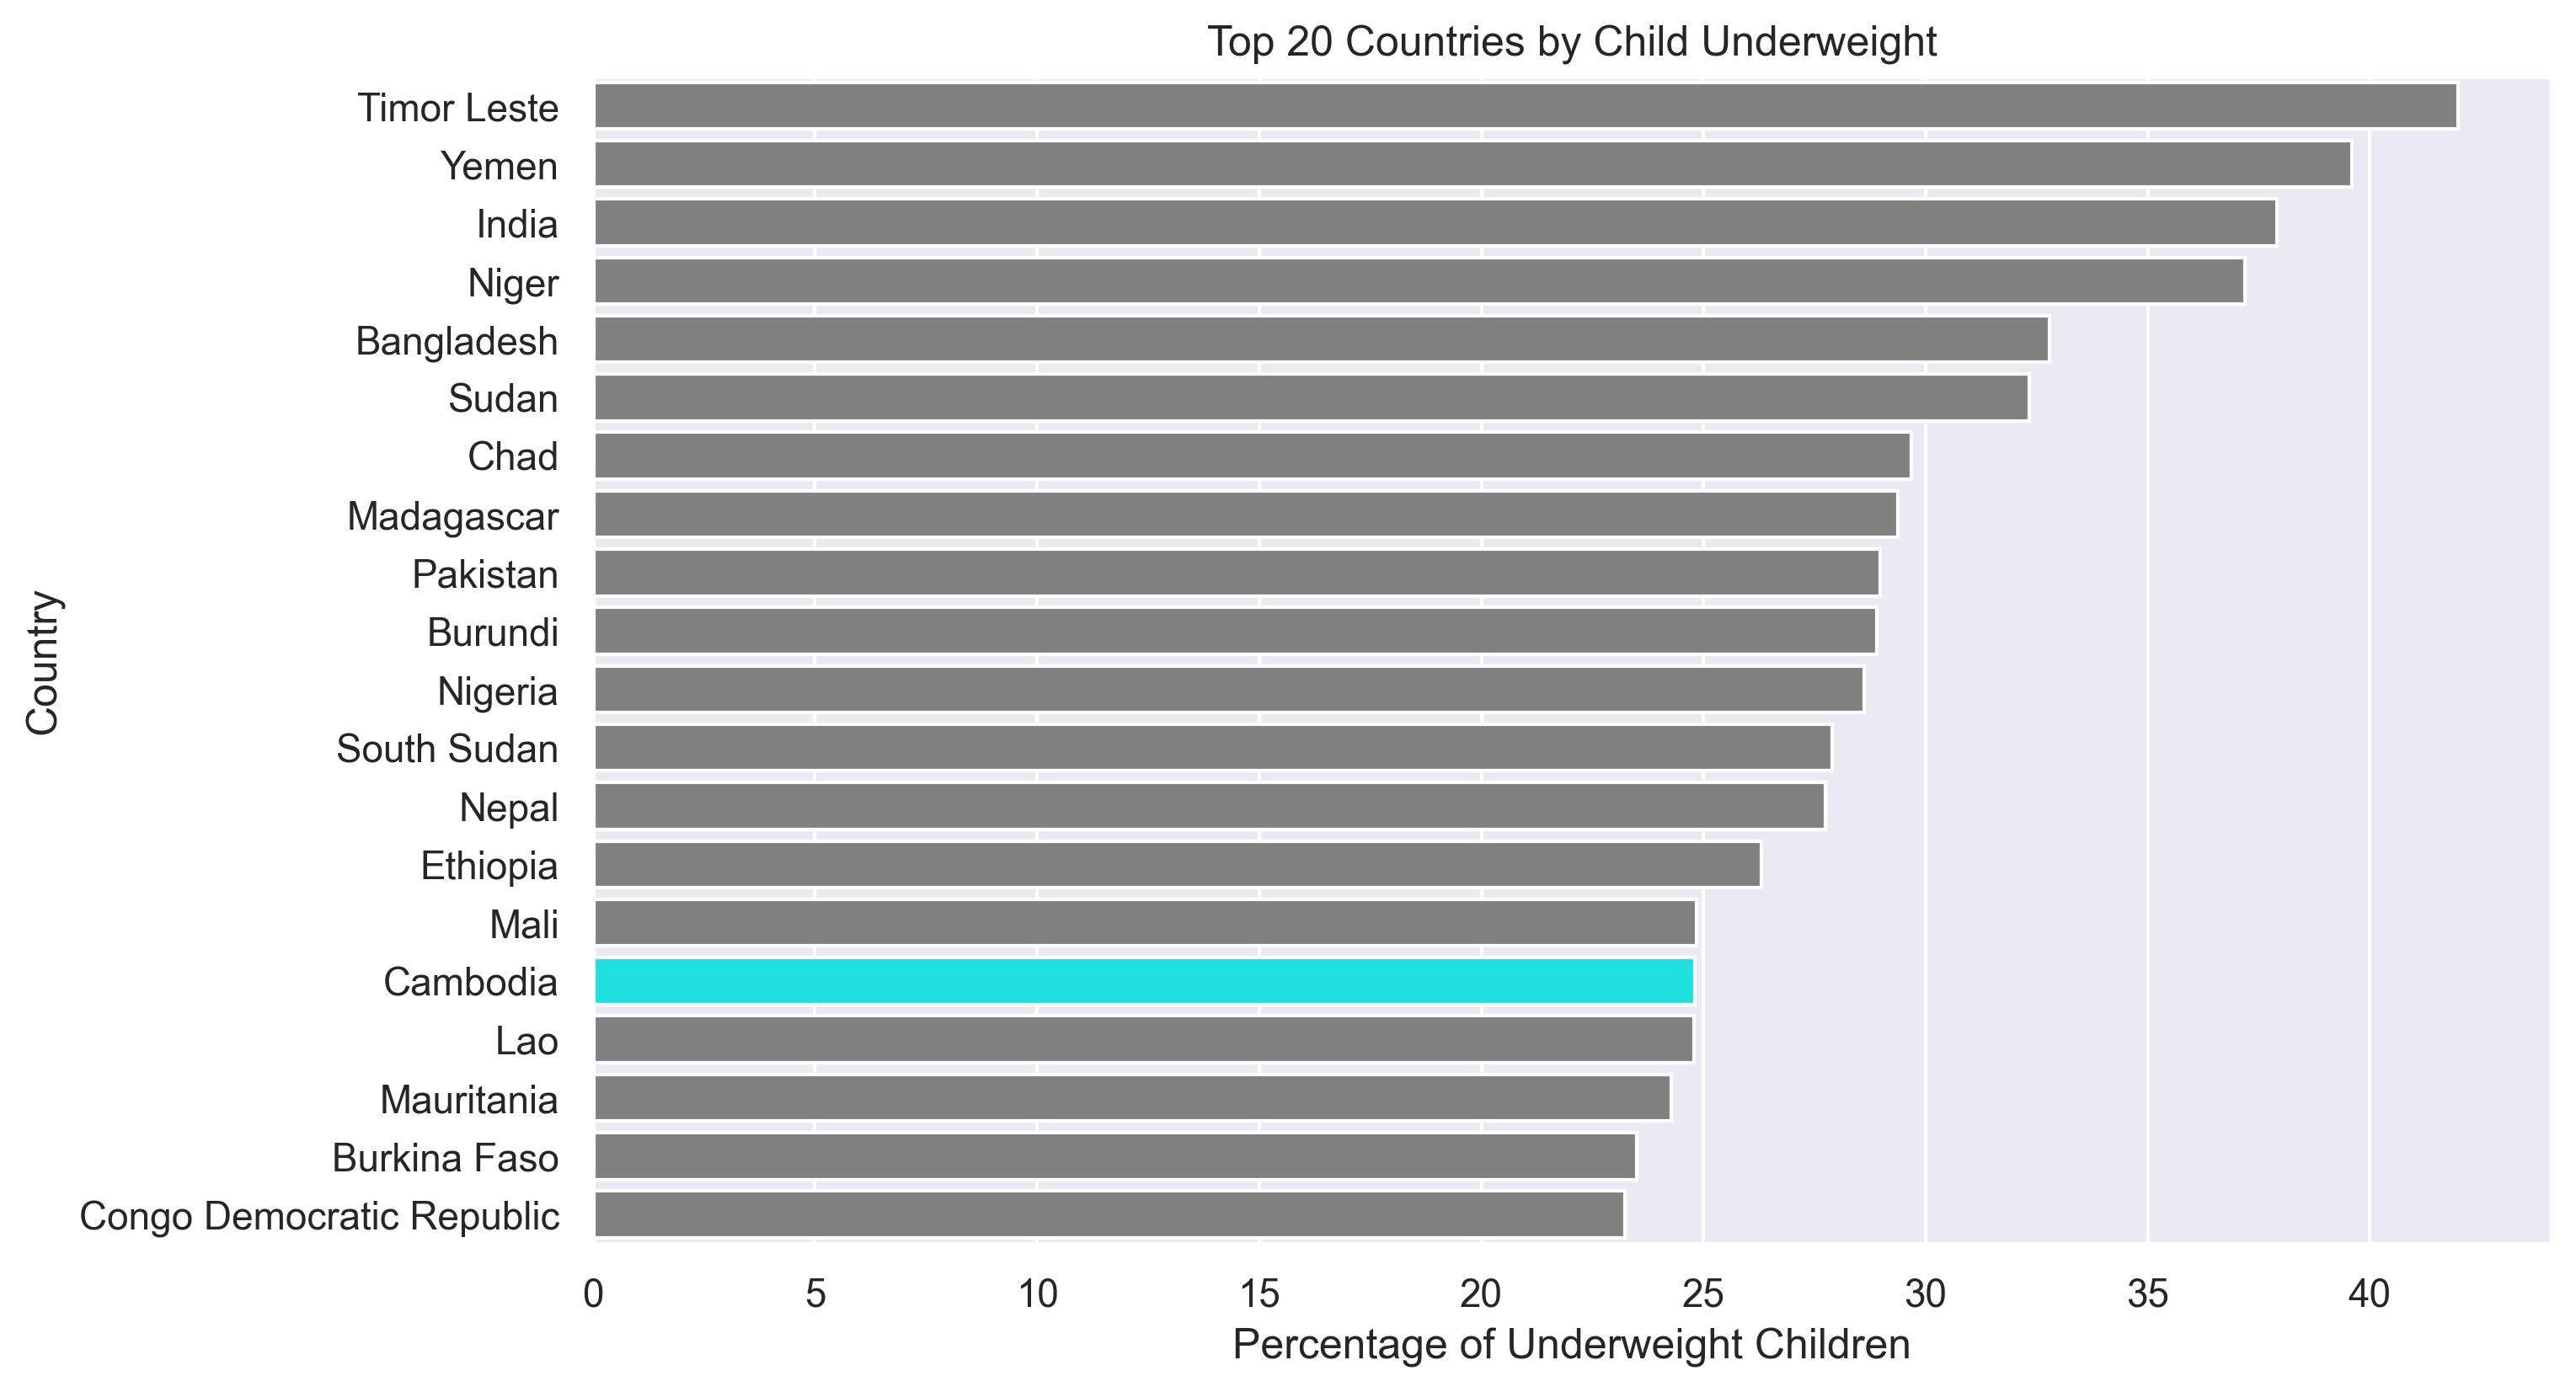

In [18]:
# Creating the barplot for most underweight children by country

plt.figure(figsize=(10, 6), dpi=300)  # Adjust the figsize and dpi for higher resolution
palette = ['aqua' if country == 'Cambodia' else 'gray' for country in most_underweight['Country Name']]
sns.barplot(x='Child Underweight', y='Country Name', data=most_underweight, orient='h', palette=palette)
plt.xlabel('Percentage of Underweight Children')
plt.ylabel('Country')
plt.title('Top 20 Countries by Child Underweight')
plt.show()

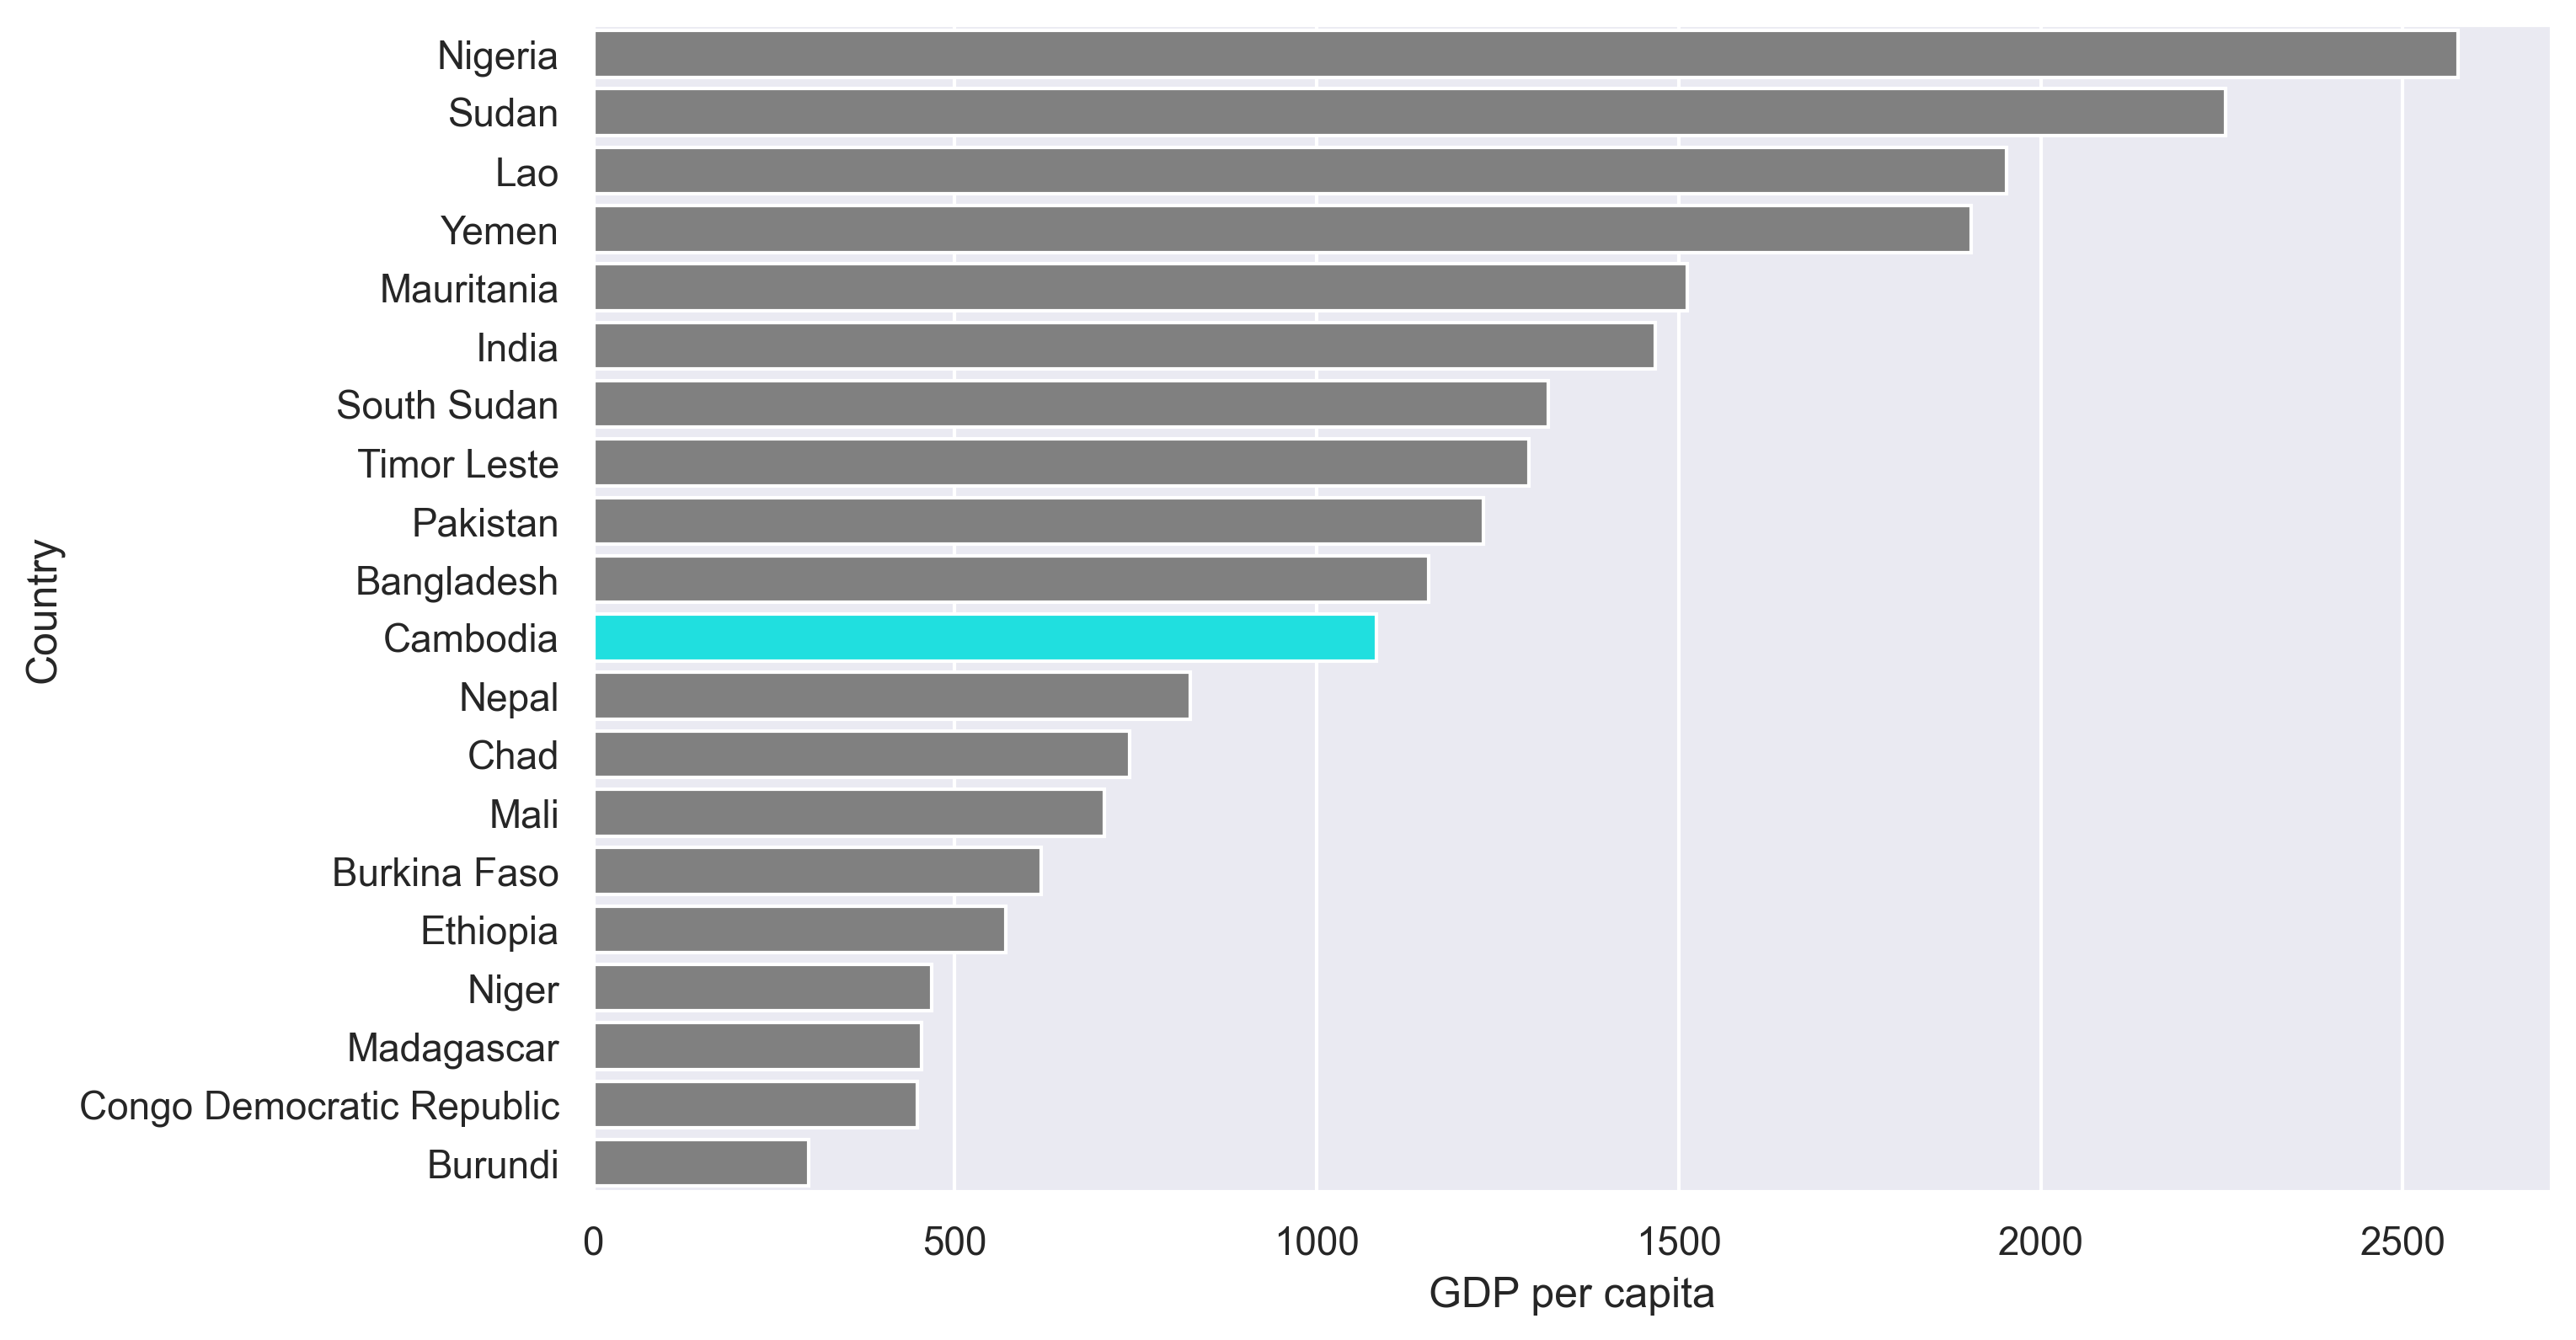

In [19]:
# Countries in the previous chart with highest per capita GDP

most_income = most_underweight.sort_values(by = 'GDP per capita', ascending = False)

plt.figure(figsize=(10, 6), dpi=300)  # Adjust the figsize and dpi for higher resolution
palette = ['aqua' if country == 'Cambodia' else 'gray' for country in most_income['Country Name']]
sns.barplot(x='GDP per capita', y='Country Name', data=most_income, orient='h', palette=palette)
plt.xlabel('GDP per capita')
plt.ylabel('Country')
plt.show()

In [20]:
!pip install geopandas matplotlib

Text(0.5, 1.0, 'Child Underweight Percentage in Top 20 Countries')

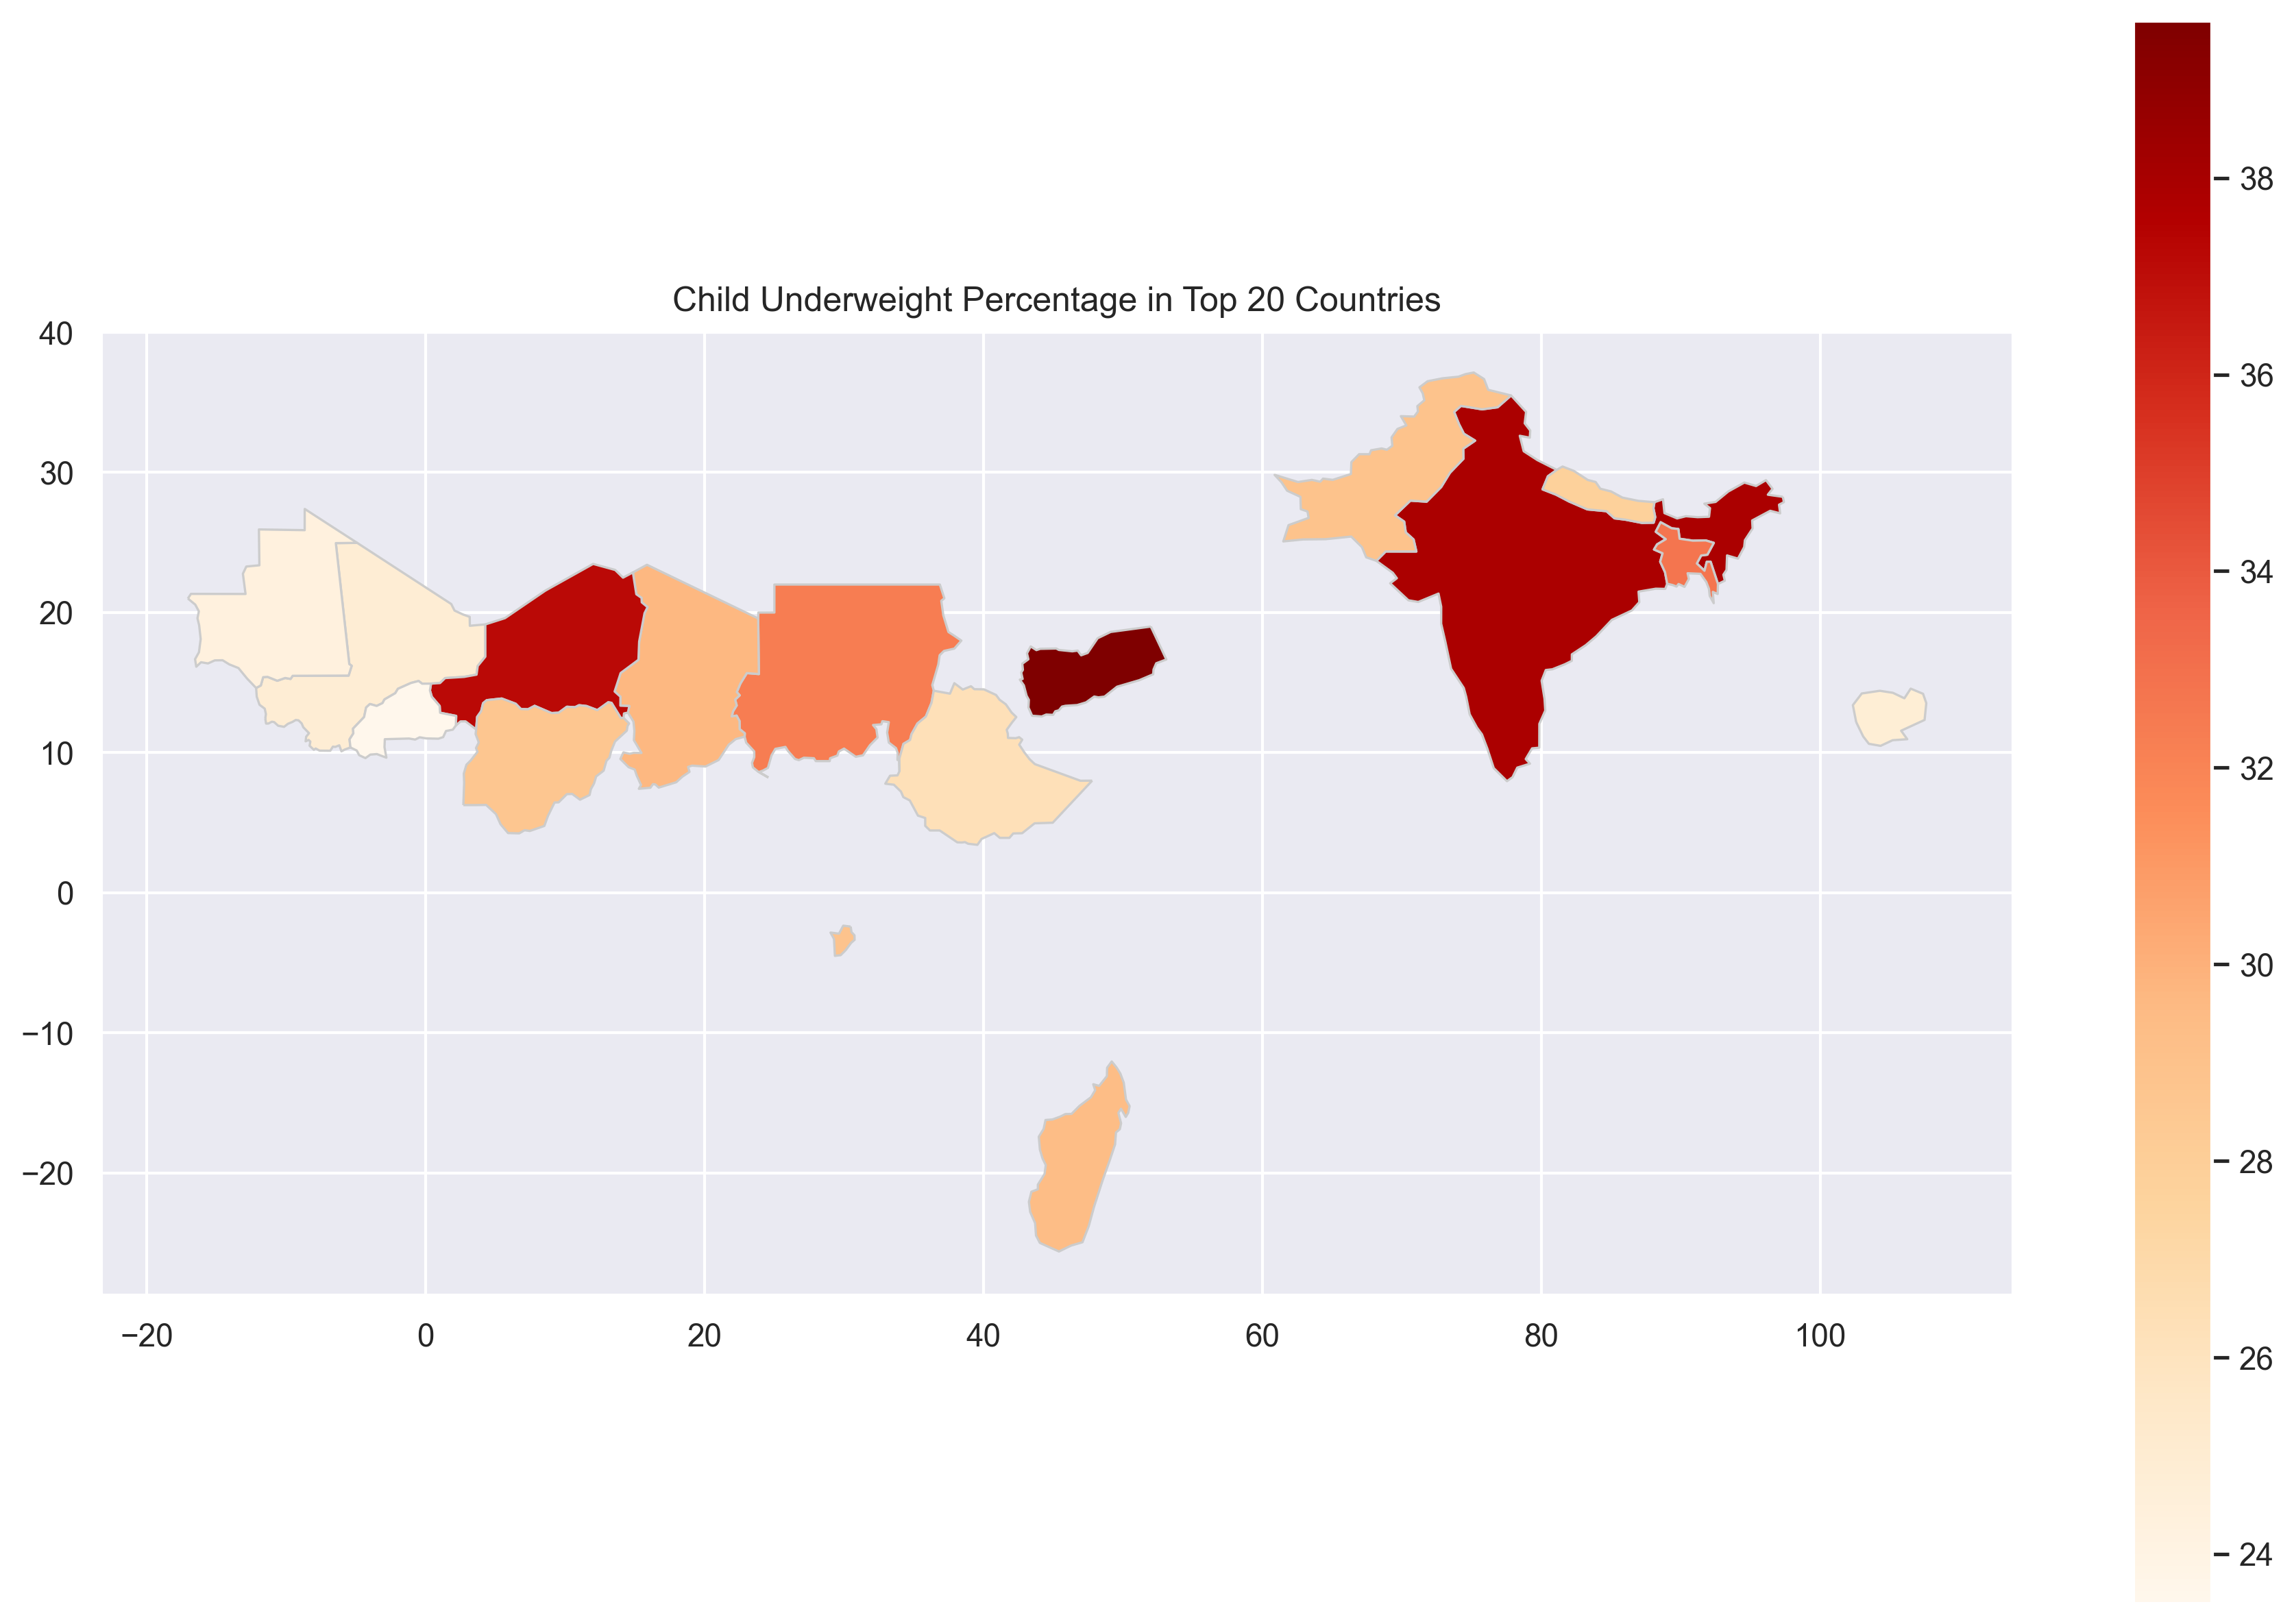

In [21]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_data = world.merge(most_underweight, left_on='name', right_on='Country Name')

fig, ax = plt.subplots(1, 1, figsize=(15, 10), dpi = 300)
merged_data.plot(column='Child Underweight', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Child Underweight Percentage in Top 20 Countries')

In [27]:
!pip install plotly.express

In [33]:
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)

fig = px.choropleth(merged_data, 
                    locations='iso_a3',  # ISO Alpha-3 country codes
                    color='Child Underweight',
                    hover_name='name',  # Country name for hover
                    title='Child Underweight Percentage in Top 20 Countries',
                    color_continuous_scale=px.colors.sequential.OrRd)

fig.update_geos(projection_type="natural earth", showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgray")

fig.show(renderer='iframe')

> ## **Observation**

As we can see, Cambodia stands at number 16 in case of countries with most underweight children while having the 10td highest income in that specific group. Countries like Congo Democrartic Republic, and Burkina Faso are performing better than Cambodia while having lower per capita GDP. This shows the severe nature of malnutrition in Cambodia.

# Data Cleaning

In [46]:
# First five rows of the dataset

dfa.head()

,Country Name,Continent,Country Code,Year,Child Underweight,Women Underweight,GDP per capita,Govt. Health Expenditure,MMR,Mother's age,Female Education
0,Algeria,Africa,DZA,2016,4.09,3.6,4246.242160,4.472452,89.0,24.5,NaN
1,Angola,Africa,AGO,2016,19.10,10.9,2914.412131,1.197537,270.0,19.1,39.741829
2,Bangladesh,Asia/Pacific,BGD,2016,28.50,23.0,1307.732333,0.569685,196.0,18.4,75.010811
3,Benin,Africa,BEN,2016,19.10,8.6,1045.150937,0.574913,590.0,20.0,50.731831
4,Bhutan,Asia/Pacific,BTN,2016,NaN,10.7,2889.493866,2.644663,66.0,NaN,89.734169


In [47]:
# Information about the dataset

dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              468 non-null    object 
 1   Continent                 468 non-null    object 
 2   Country Code              468 non-null    object 
 3   Year                      468 non-null    int64  
 4   Child Underweight         376 non-null    float64
 5   Women Underweight         456 non-null    float64
 6   GDP per capita            457 non-null    float64
 7   Govt. Health Expenditure  451 non-null    float64
 8   MMR                       462 non-null    float64
 9   Mother's age              377 non-null    float64
 10  Female Education          293 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 40.3+ KB


## - Dropping Duplicates

In [48]:
# Dropping duplicates if any

dfa.drop_duplicates()

,Country Name,Continent,Country Code,Year,Child Underweight,Women Underweight,GDP per capita,Govt. Health Expenditure,MMR,Mother's age,Female Education
0,Algeria,Africa,DZA,2016,4.09,3.6,4246.242160,4.472452,89.0,24.5,NaN
1,Angola,Africa,AGO,2016,19.10,10.9,2914.412131,1.197537,270.0,19.1,39.741829
2,Bangladesh,Asia/Pacific,BGD,2016,28.50,23.0,1307.732333,0.569685,196.0,18.4,75.010811
3,Benin,Africa,BEN,2016,19.10,8.6,1045.150937,0.574913,590.0,20.0,50.731831
4,Bhutan,Asia/Pacific,BTN,2016,NaN,10.7,2889.493866,2.644663,66.0,NaN,89.734169
...,...,...,...,...,...,...,...,...,...,...,...
463,Vanuatu,Asia/Pacific,VUT,2011,NaN,2.8,2768.747027,2.360593,95.0,NaN,NaN
464,Vietnam,Asia/Pacific,VNM,2011,11.70,20.3,2135.782152,1.784869,90.0,22.6,NaN
465,Yemen,Asia/Pacific,YEM,2011,39.60,9.0,2159.845146,1.092118,155.0,19.5,35.637112
466,Zambia,Africa,ZMB,2011,14.50,9.6,1222.979058,1.203880,233.0,18.8,NaN


## - Null Value Treatment

In [49]:
# Null value percentage in the each column

dfa.isnull().sum()/468 * 100

Country Name                 0.000000
Continent                    0.000000
Country Code                 0.000000
Year                         0.000000
Child Underweight           19.658120
Women Underweight            2.564103
GDP per capita               2.350427
Govt. Health Expenditure     3.632479
MMR                          1.282051
Mother's age                19.444444
Female Education            37.393162
dtype: float64

In [50]:
# Finding country average for each columns

country_avg = dfa.groupby('Country Name').mean()
country_avg

,Year,Child Underweight,Women Underweight,GDP per capita,Govt. Health Expenditure,MMR,Mother's age,Female Education
Country Name,,,,,,,,
Algeria,2013.5,5.255000,3.783333,4104.358532,4.414700,93.666667,24.500000,101.544517
Angola,2013.5,19.100000,11.400000,3075.575624,1.453610,294.333333,19.000000,30.231264
Bangladesh,2013.5,32.783333,24.100000,1154.422996,0.534132,230.666667,18.050000,64.454487
Benin,2013.5,21.416667,9.000000,1017.376611,0.673831,606.833333,20.033333,45.581461
Bhutan,2013.5,12.700000,11.483333,2550.826815,2.570127,81.333333,20.700000,80.753728
...,...,...,...,...,...,...,...,...
Vanuatu,2013.5,NaN,2.616667,2703.744558,1.820137,91.166667,NaN,54.949249
Vietnam,2013.5,11.700000,19.216667,2413.413675,2.043299,101.666667,22.283333,NaN
Yemen,2013.5,39.600000,8.500000,1903.875623,0.905914,159.333333,19.633333,38.952631


In [51]:
# Seperating out country and continent

dsep = dfa[['Country Name', 'Continent', 'Country Code', 'Year']]
dsep

,Country Name,Continent,Country Code,Year
0,Algeria,Africa,DZA,2016
1,Angola,Africa,AGO,2016
2,Bangladesh,Asia/Pacific,BGD,2016
3,Benin,Africa,BEN,2016
4,Bhutan,Asia/Pacific,BTN,2016
...,...,...,...,...
463,Vanuatu,Asia/Pacific,VUT,2011
464,Vietnam,Asia/Pacific,VNM,2011
465,Yemen,Asia/Pacific,YEM,2011
466,Zambia,Africa,ZMB,2011


In [52]:
dfa.drop(columns = ['Continent', 'Country Code'], inplace = True)

In [53]:
# Replacing the null values with the country average

dfa.set_index('Country Name', inplace=True)

for column in dfa.columns:
    dfa[column].fillna(country_avg[column], inplace=True)

dfa.reset_index(inplace=True)
dfa

,Country Name,Year,Child Underweight,Women Underweight,GDP per capita,Govt. Health Expenditure,MMR,Mother's age,Female Education
0,Algeria,2016,4.09,3.6,4246.242160,4.472452,89.0,24.5,101.544517
1,Angola,2016,19.10,10.9,2914.412131,1.197537,270.0,19.1,39.741829
2,Bangladesh,2016,28.50,23.0,1307.732333,0.569685,196.0,18.4,75.010811
3,Benin,2016,19.10,8.6,1045.150937,0.574913,590.0,20.0,50.731831
4,Bhutan,2016,12.70,10.7,2889.493866,2.644663,66.0,20.7,89.734169
...,...,...,...,...,...,...,...,...,...
463,Vanuatu,2011,NaN,2.8,2768.747027,2.360593,95.0,NaN,54.949249
464,Vietnam,2011,11.70,20.3,2135.782152,1.784869,90.0,22.6,NaN
465,Yemen,2011,39.60,9.0,2159.845146,1.092118,155.0,19.5,35.637112
466,Zambia,2011,14.50,9.6,1222.979058,1.203880,233.0,18.8,NaN


In [54]:
# adding back the 'Continent', 'Country Code' columns in dfa

dfa = dsep.merge(dfa, on = ['Country Name', 'Year'], how = 'inner')
dfa

,Country Name,Continent,Country Code,Year,Child Underweight,Women Underweight,GDP per capita,Govt. Health Expenditure,MMR,Mother's age,Female Education
0,Algeria,Africa,DZA,2016,4.09,3.6,4246.242160,4.472452,89.0,24.5,101.544517
1,Angola,Africa,AGO,2016,19.10,10.9,2914.412131,1.197537,270.0,19.1,39.741829
2,Bangladesh,Asia/Pacific,BGD,2016,28.50,23.0,1307.732333,0.569685,196.0,18.4,75.010811
3,Benin,Africa,BEN,2016,19.10,8.6,1045.150937,0.574913,590.0,20.0,50.731831
4,Bhutan,Asia/Pacific,BTN,2016,12.70,10.7,2889.493866,2.644663,66.0,20.7,89.734169
...,...,...,...,...,...,...,...,...,...,...,...
463,Vanuatu,Asia/Pacific,VUT,2011,NaN,2.8,2768.747027,2.360593,95.0,NaN,54.949249
464,Vietnam,Asia/Pacific,VNM,2011,11.70,20.3,2135.782152,1.784869,90.0,22.6,NaN
465,Yemen,Asia/Pacific,YEM,2011,39.60,9.0,2159.845146,1.092118,155.0,19.5,35.637112
466,Zambia,Africa,ZMB,2011,14.50,9.6,1222.979058,1.203880,233.0,18.8,NaN


In [55]:
# Checking if there still null values left

dfa.isnull().sum()/468 * 100

Country Name                 0.000000
Continent                    0.000000
Country Code                 0.000000
Year                         0.000000
Child Underweight           10.256410
Women Underweight            2.564103
GDP per capita               1.282051
Govt. Health Expenditure     2.564103
MMR                          1.282051
Mother's age                 8.974359
Female Education            19.230769
dtype: float64

In [56]:
dfa.head(10)

,Country Name,Continent,Country Code,Year,Child Underweight,Women Underweight,GDP per capita,Govt. Health Expenditure,MMR,Mother's age,Female Education
0,Algeria,Africa,DZA,2016,4.09,3.6,4246.242160,4.472452,89.0,24.5,101.544517
1,Angola,Africa,AGO,2016,19.10,10.9,2914.412131,1.197537,270.0,19.1,39.741829
2,Bangladesh,Asia/Pacific,BGD,2016,28.50,23.0,1307.732333,0.569685,196.0,18.4,75.010811
3,Benin,Africa,BEN,2016,19.10,8.6,1045.150937,0.574913,590.0,20.0,50.731831
4,Bhutan,Asia/Pacific,BTN,2016,12.70,10.7,2889.493866,2.644663,66.0,20.7,89.734169
5,Burkina Faso,Africa,BFA,2016,23.50,12.7,650.417261,2.386831,293.0,19.2,34.871910
6,Burundi,Africa,BDI,2016,29.10,11.2,282.975967,2.345776,508.0,20.7,47.356010
7,Cambodia,Asia/Pacific,KHM,2016,22.40,14.1,1235.323404,1.333815,197.0,21.5,NaN
8,Cameroon,Africa,CMR,2016,12.30,6.3,1420.029872,0.365931,437.0,19.4,55.443081
9,Central African Republic CAR,Africa,CAF,2016,22.10,12.3,362.218331,0.599534,877.0,19.0,11.841000


In [57]:
country = 'Cambodia'
column_to_fill = 'Female Education'
value_to_fill = 75  

# Set NaN values for the specified country and column
dfa.loc[dfa['Country Name'] == country, column_to_fill] = dfa.loc[dfa['Country Name'] == country, column_to_fill].fillna(value_to_fill)

In [58]:
dfa.head(10)

,Country Name,Continent,Country Code,Year,Child Underweight,Women Underweight,GDP per capita,Govt. Health Expenditure,MMR,Mother's age,Female Education
0,Algeria,Africa,DZA,2016,4.09,3.6,4246.242160,4.472452,89.0,24.5,101.544517
1,Angola,Africa,AGO,2016,19.10,10.9,2914.412131,1.197537,270.0,19.1,39.741829
2,Bangladesh,Asia/Pacific,BGD,2016,28.50,23.0,1307.732333,0.569685,196.0,18.4,75.010811
3,Benin,Africa,BEN,2016,19.10,8.6,1045.150937,0.574913,590.0,20.0,50.731831
4,Bhutan,Asia/Pacific,BTN,2016,12.70,10.7,2889.493866,2.644663,66.0,20.7,89.734169
5,Burkina Faso,Africa,BFA,2016,23.50,12.7,650.417261,2.386831,293.0,19.2,34.871910
6,Burundi,Africa,BDI,2016,29.10,11.2,282.975967,2.345776,508.0,20.7,47.356010
7,Cambodia,Asia/Pacific,KHM,2016,22.40,14.1,1235.323404,1.333815,197.0,21.5,75.000000
8,Cameroon,Africa,CMR,2016,12.30,6.3,1420.029872,0.365931,437.0,19.4,55.443081
9,Central African Republic CAR,Africa,CAF,2016,22.10,12.3,362.218331,0.599534,877.0,19.0,11.841000


In [59]:
# Checking if there still null values left

dfa.isnull().sum()/468 * 100

Country Name                 0.000000
Continent                    0.000000
Country Code                 0.000000
Year                         0.000000
Child Underweight           10.256410
Women Underweight            2.564103
GDP per capita               1.282051
Govt. Health Expenditure     2.564103
MMR                          1.282051
Mother's age                 8.974359
Female Education            17.948718
dtype: float64

> ## **Observation:**

Beacuse there are still null values left, that means there are some countries for which data is not available for any year. We have no choice but to drop these rows.

In [60]:
dfa.dropna(inplace = True)

## - Checking for outliers in the dataset

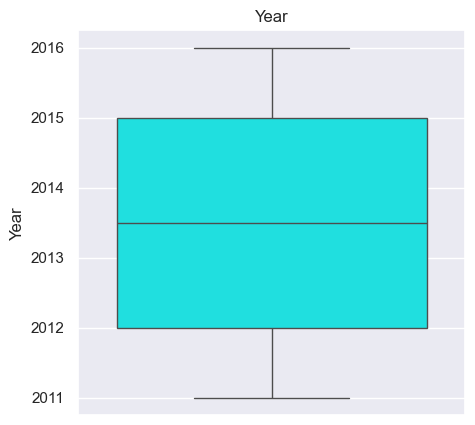

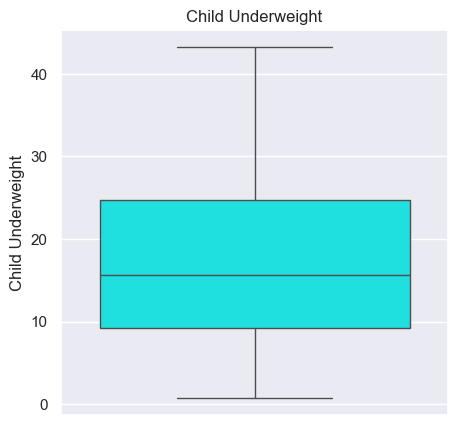

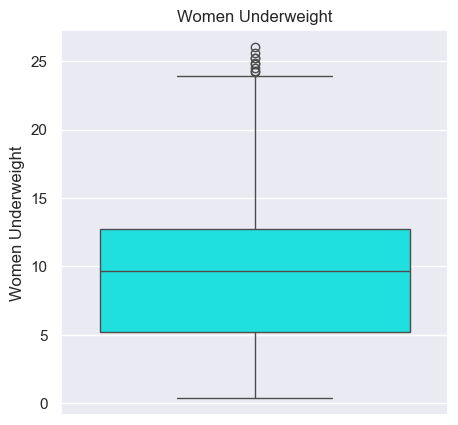

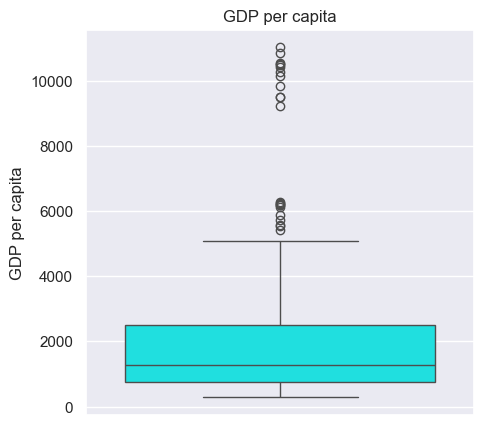

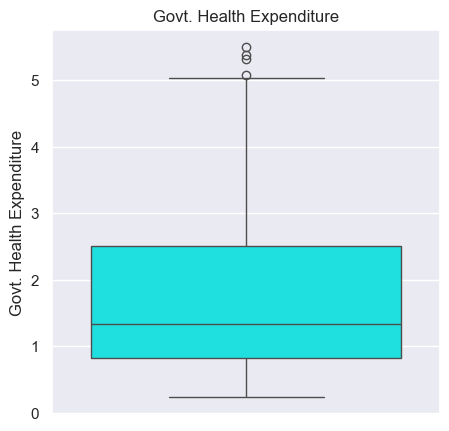

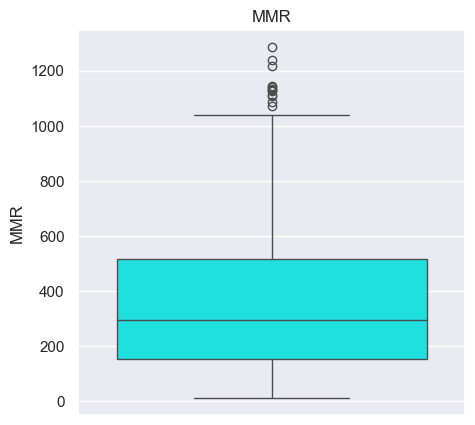

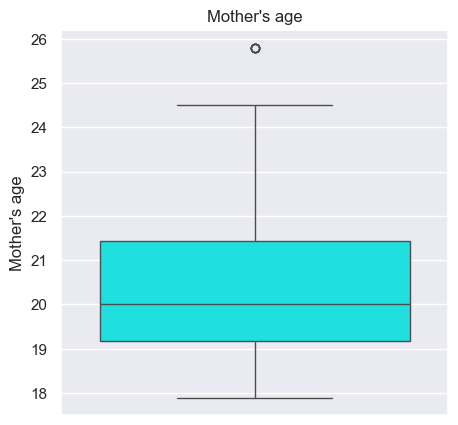

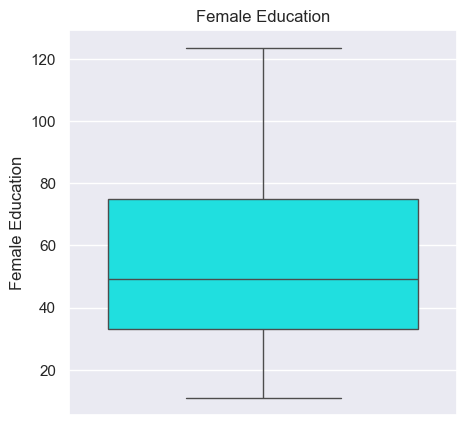

In [61]:
# Creating boxplots to show outliers in each numerical column

def boxplot(col):
    plt.figure(figsize=(5, 5), dpi=100)
    sns.boxplot(dfa[col], color = 'aqua')
    plt.title(col)
    plt.show()
    
for i in list(dfa.select_dtypes(exclude = ['object']).columns)[0:]:
    boxplot(i)

In [62]:
Q1 = dfa.quantile(0.25)
Q3 = dfa.quantile(0.75)
IQR = Q3 - Q1

up = Q3 + IQR * 1.5
down = Q1 - IQR * 1.5

print(up)
print('-----')
print(down)

Year                        2019.500000
Child Underweight             47.950000
Women Underweight             23.950000
GDP per capita              5126.561999
Govt. Health Expenditure       5.035956
MMR                         1061.625000
Mother's age                  24.800000
Female Education             137.901141
dtype: float64
-----
Year                        2007.500000
Child Underweight            -14.050000
Women Underweight             -6.050000
GDP per capita             -1890.044692
Govt. Health Expenditure      -1.720081
MMR                         -395.375000
Mother's age                  15.800000
Female Education             -29.828027
dtype: float64


# Data Visualization (EDA)

Here we try to visualize our data and conduct explanatory data analysis. The purpose of this step is to find the relationship between different variables and observe how the variables change with time

In [63]:
# Finding average values of the variables for continents and years

filter_dfa = dfa[dfa['Continent'].isin(['Asia/Pacific', 'Africa'])]
avg = filter_dfa.groupby(['Continent', 'Year']).mean()
avg

Child Underweight  Women Underweight  GDP per capita  \
Continent    Year                                                         
Africa       2011          17.915429           9.648571     1451.314971   
             2012          17.457429           9.477143     1495.192523   
             2013          17.035714           9.320000     1519.218117   
             2014          16.572286           9.151429     1546.920229   
             2015          16.338000           9.005714     1550.921266   
             2016          16.006000           8.848571     1547.337849   
Asia/Pacific 2011          19.364211          10.700000     2851.828282   
             2012          19.022105          10.489474     2925.133476   
             2013          18.506842          10.268421     3011.679383   
             2014          17.986316          10.068421     3071.978141   
             2015          17.442632           9.863158     3100.721145   
             2016          16.972105           9.657895     3178.385870   

                   Govt. Health Expenditure         MMR  Mother's age  \
Continent    Year                                                       
Africa       2011                  1.610675  514.714286     19.794286   
             2012                  1.551408  493.628571     19.828571   
             2013                  1.587328  473.628571     19.862857   
             2014                  1.657637  461.685714     19.920000   
             2015                  1.639123  441.200000     19.968571   
             2016                  1.700607  422.314286     20.013714   
Asia/Pacific 2011                  2.022696  159.052632     21.184211   
             2012                  2.132474  150.842105     21.231579   
             2013                  2.135970  142.000000     21.268421   
             2014                  2.131893  136.105263     21.321053   
             2015                  2.072283  130.473684     21.373684   
             2016                  1.994843  124.368421     21.410526   

                   Female Education  
Continent    Year                    
Africa       2011         42.140863  
             2012         44.176856  
             2013         45.934251  
             2014         46.896507  
             2015         47.596372  
             2016         48.442145  
Asia/Pacific 2011         68.706446  
             2012         69.347959  
             2013         71.410117  
             2014         75.161911  
             2015         76.660425  
             2016         78.404660

In [64]:
avg.reset_index(inplace = True)

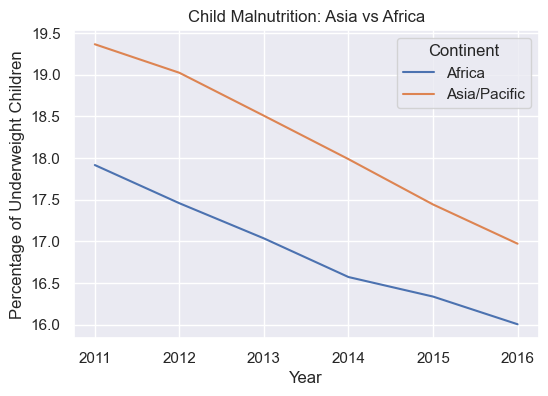

In [65]:
# Creating line plot for Child Underweight

plt.figure(figsize = (6,4), dpi = 100)
sns.lineplot(data = avg, x = 'Year', y = 'Child Underweight', hue = 'Continent')
plt.title('Child Malnutrition: Asia vs Africa')
plt.xlabel('Year')
plt.ylabel('Percentage of Underweight Children')
plt.show()

> # **Observation:**

* Historically, Africa is performing much better than Asia in terms of Child Nutrition
* For both the countries, average percentage of underweight children is decreasing

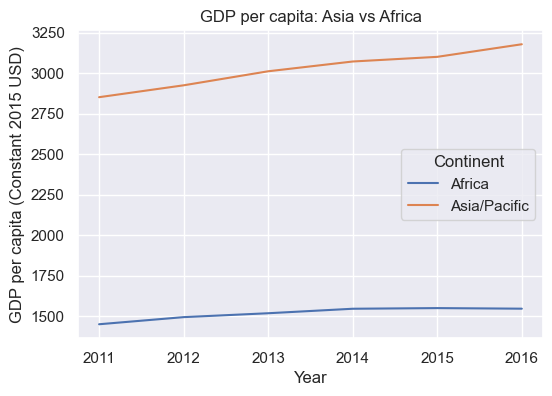

In [66]:
# Creating line plot for GDP per capita

plt.figure(figsize = (6,4), dpi = 100)
sns.lineplot(data = avg, x = 'Year', y = 'GDP per capita', hue = 'Continent')
plt.title('GDP per capita: Asia vs Africa')
plt.xlabel('Year')
plt.ylabel('GDP per capita (Constant 2015 USD)')
plt.show()

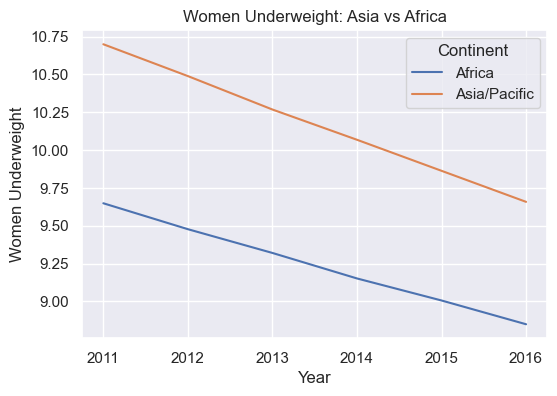

In [67]:
# Creating line plot for Women Underweight

plt.figure(figsize = (6,4), dpi = 100)
sns.lineplot(data = avg, x = 'Year', y = 'Women Underweight', hue = 'Continent')
plt.title('Women Underweight: Asia vs Africa')
plt.xlabel('Year')
plt.ylabel('Women Underweight')
plt.show()

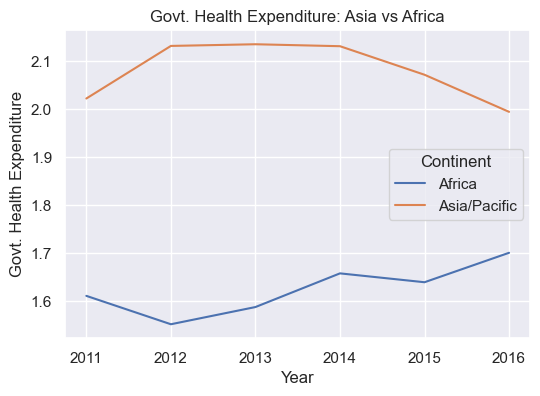

In [68]:
# Creating line plot for Govt. Health Expenditure

plt.figure(figsize = (6,4), dpi = 100)
sns.lineplot(data = avg, x = 'Year', y = 'Govt. Health Expenditure', hue = 'Continent')
plt.title('Govt. Health Expenditure: Asia vs Africa')
plt.xlabel('Year')
plt.ylabel('Govt. Health Expenditure')
plt.show()

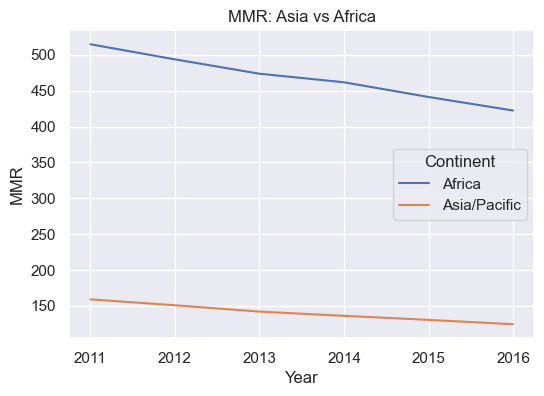

In [69]:
# Creating line plot for MMR

plt.figure(figsize = (6,4), dpi = 100)
sns.lineplot(data = avg, x = 'Year', y = 'MMR', hue = 'Continent')
plt.title('MMR: Asia vs Africa')
plt.xlabel('Year')
plt.ylabel('MMR')
plt.show()

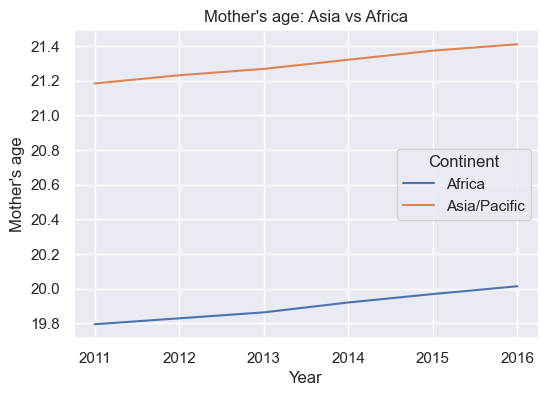

In [70]:
# Creating line plot for Mother's age

plt.figure(figsize = (6,4), dpi = 100)
sns.lineplot(data = avg, x = 'Year', y = "Mother's age", hue = 'Continent')
plt.title("Mother's age: Asia vs Africa")
plt.xlabel('Year')
plt.ylabel("Mother's age")
plt.show()

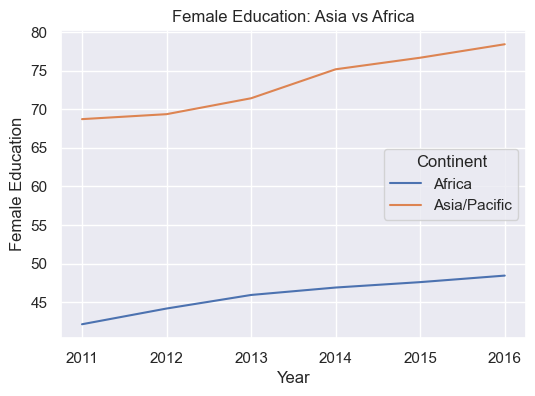

In [71]:
# Creating line plot for Mother's age

plt.figure(figsize = (6,4), dpi = 100)
sns.lineplot(data = avg, x = 'Year', y = "Female Education", hue = 'Continent')
plt.title("Female Education: Asia vs Africa")
plt.xlabel('Year')
plt.ylabel("Female Education")
plt.show()

> # **Observation:**

* Historically, Asia is much more wealthy than Africa
* From the diagram, it can also be observed that Asia's growth rate of GDP is also higher than that of Africa
* It is concerning that even with high level of income advantage over African countries, Asia is unable to control child malnutrition

In [72]:
# Values for Cambodia

Khm = dfa[dfa['Country Name'].str.contains('Cambodia')]
Khm

,Country Name,Continent,Country Code,Year,Child Underweight,Women Underweight,GDP per capita,Govt. Health Expenditure,MMR,Mother's age,Female Education
7,Cambodia,Asia/Pacific,KHM,2016,22.4,14.1,1235.323404,1.333815,197.0,21.5,75.0
85,Cambodia,Asia/Pacific,KHM,2015,23.3,14.4,1170.742816,1.344651,209.0,21.5,75.0
163,Cambodia,Asia/Pacific,KHM,2014,24.3,14.7,1109.375653,1.239772,228.0,21.5,75.0
241,Cambodia,Asia/Pacific,KHM,2013,25.3,15.0,1049.994506,1.419558,229.0,21.4,75.0
319,Cambodia,Asia/Pacific,KHM,2012,26.3,15.3,992.134600,1.406703,246.0,21.4,75.0
397,Cambodia,Asia/Pacific,KHM,2011,27.2,15.6,938.017677,1.279871,252.0,21.4,75.0


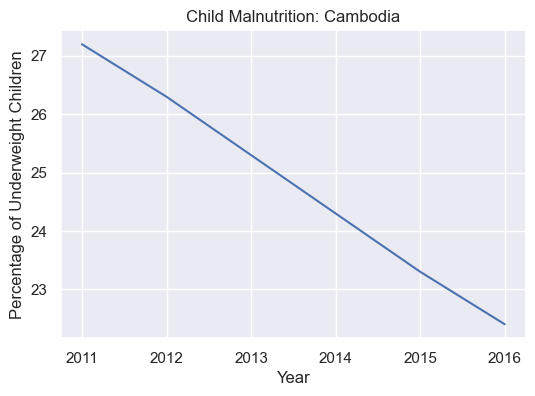

In [73]:
# Line plot for Child Underweight

plt.figure(figsize = (6,4), dpi = 100)
sns.lineplot(data = Khm, x = 'Year', y = 'Child Underweight')
plt.title('Child Malnutrition: Cambodia')
plt.xlabel('Year')
plt.ylabel('Percentage of Underweight Children')
plt.show()

> # **Observation:**

Percentage of underweight children have been decreasing in Cambodia since 2011

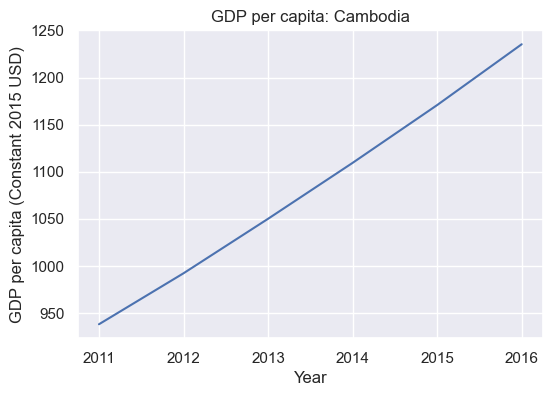

In [74]:
# Line plot for GDP per capita

plt.figure(figsize = (6,4))
sns.lineplot(data = Khm, x = 'Year', y = 'GDP per capita')
plt.title('GDP per capita: Cambodia')
plt.xlabel('Year')
plt.ylabel('GDP per capita (Constant 2015 USD)')
plt.show()

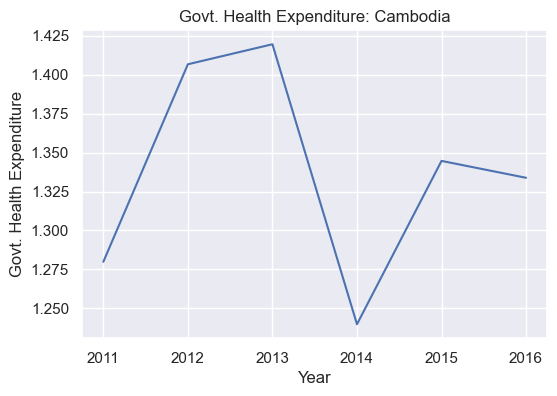

In [75]:
# Line plot for GDP per capita

plt.figure(figsize = (6,4))
sns.lineplot(data = Khm, x = 'Year', y = 'Govt. Health Expenditure')
plt.title('Govt. Health Expenditure: Cambodia')
plt.xlabel('Year')
plt.ylabel('Govt. Health Expenditure')
plt.show()

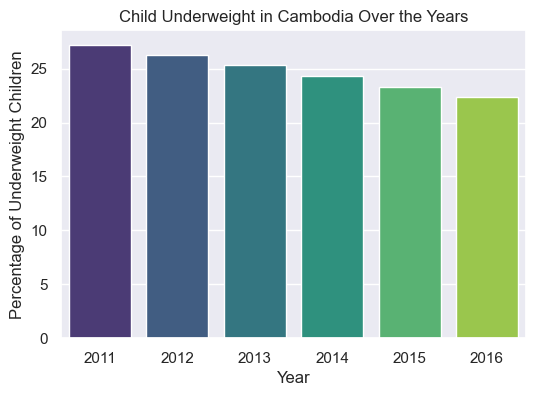

In [76]:
# Bar plot for Child Underweight in Cambodia
plt.figure(figsize=(6, 4), dpi = 100)
sns.barplot(data=Khm, x='Year', y='Child Underweight', palette='viridis')
plt.title('Child Underweight in Cambodia Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Underweight Children')
plt.show()


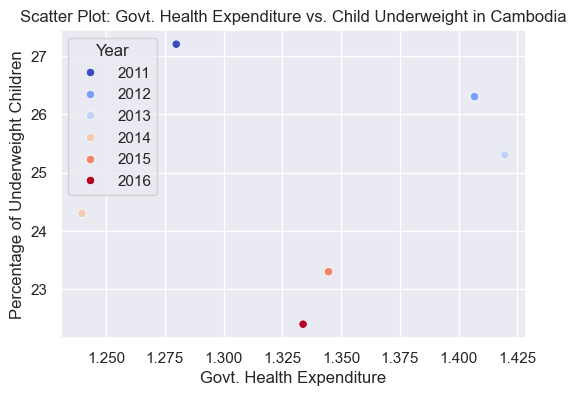

In [77]:
# Scatter plot for Govt. Health Expenditure vs. Child Underweight in Cambodia
plt.figure(figsize=(6, 4))
sns.scatterplot(data=Khm, x='Govt. Health Expenditure', y='Child Underweight', hue='Year', palette='coolwarm')
plt.title('Scatter Plot: Govt. Health Expenditure vs. Child Underweight in Cambodia')
plt.xlabel('Govt. Health Expenditure')
plt.ylabel('Percentage of Underweight Children')
plt.show()

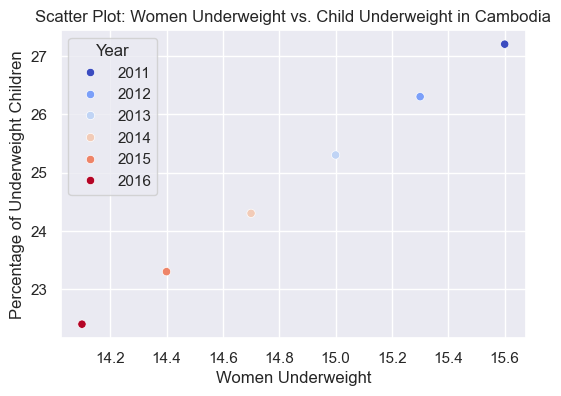

In [78]:
# Scatter plot for Women Underweight vs. Child Underweight in Cambodia
plt.figure(figsize=(6, 4))
sns.scatterplot(data=Khm, x='Women Underweight', y='Child Underweight', hue='Year', palette='coolwarm')
plt.title('Scatter Plot: Women Underweight vs. Child Underweight in Cambodia')
plt.xlabel('Women Underweight')
plt.ylabel('Percentage of Underweight Children')
plt.show()

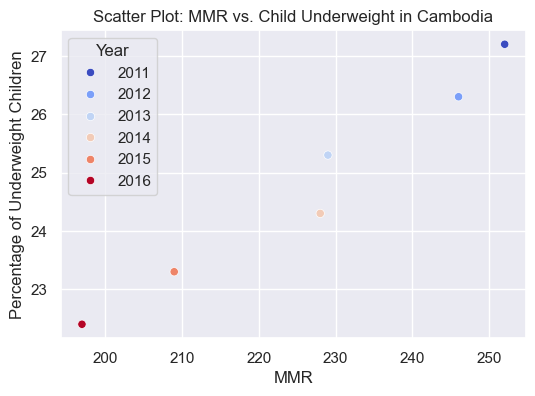

In [79]:
# Scatter plot for MMR vs. Child Underweight in Cambodia
plt.figure(figsize=(6, 4))
sns.scatterplot(data=Khm, x='MMR', y='Child Underweight', hue='Year', palette='coolwarm')
plt.title('Scatter Plot: MMR vs. Child Underweight in Cambodia')
plt.xlabel('MMR')
plt.ylabel('Percentage of Underweight Children')
plt.show()

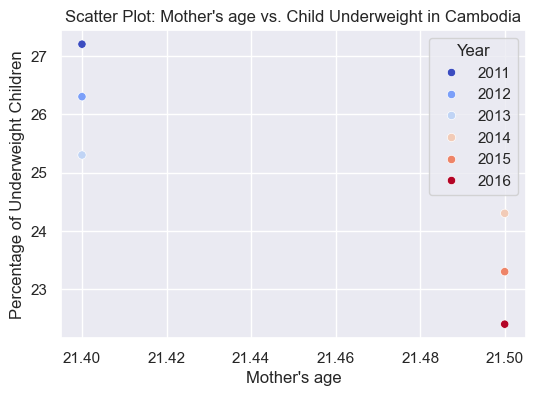

In [80]:
# Scatter plot for Mother's age vs. Child Underweight in Cambodia
plt.figure(figsize=(6, 4))
sns.scatterplot(data=Khm, x="Mother's age", y='Child Underweight', hue='Year', palette='coolwarm')
plt.title("Scatter Plot: Mother's age vs. Child Underweight in Cambodia")
plt.xlabel("Mother's age")
plt.ylabel('Percentage of Underweight Children')
plt.show()

> # **Observation:**

GDP in Cambodia had been growing in very rapid pace.

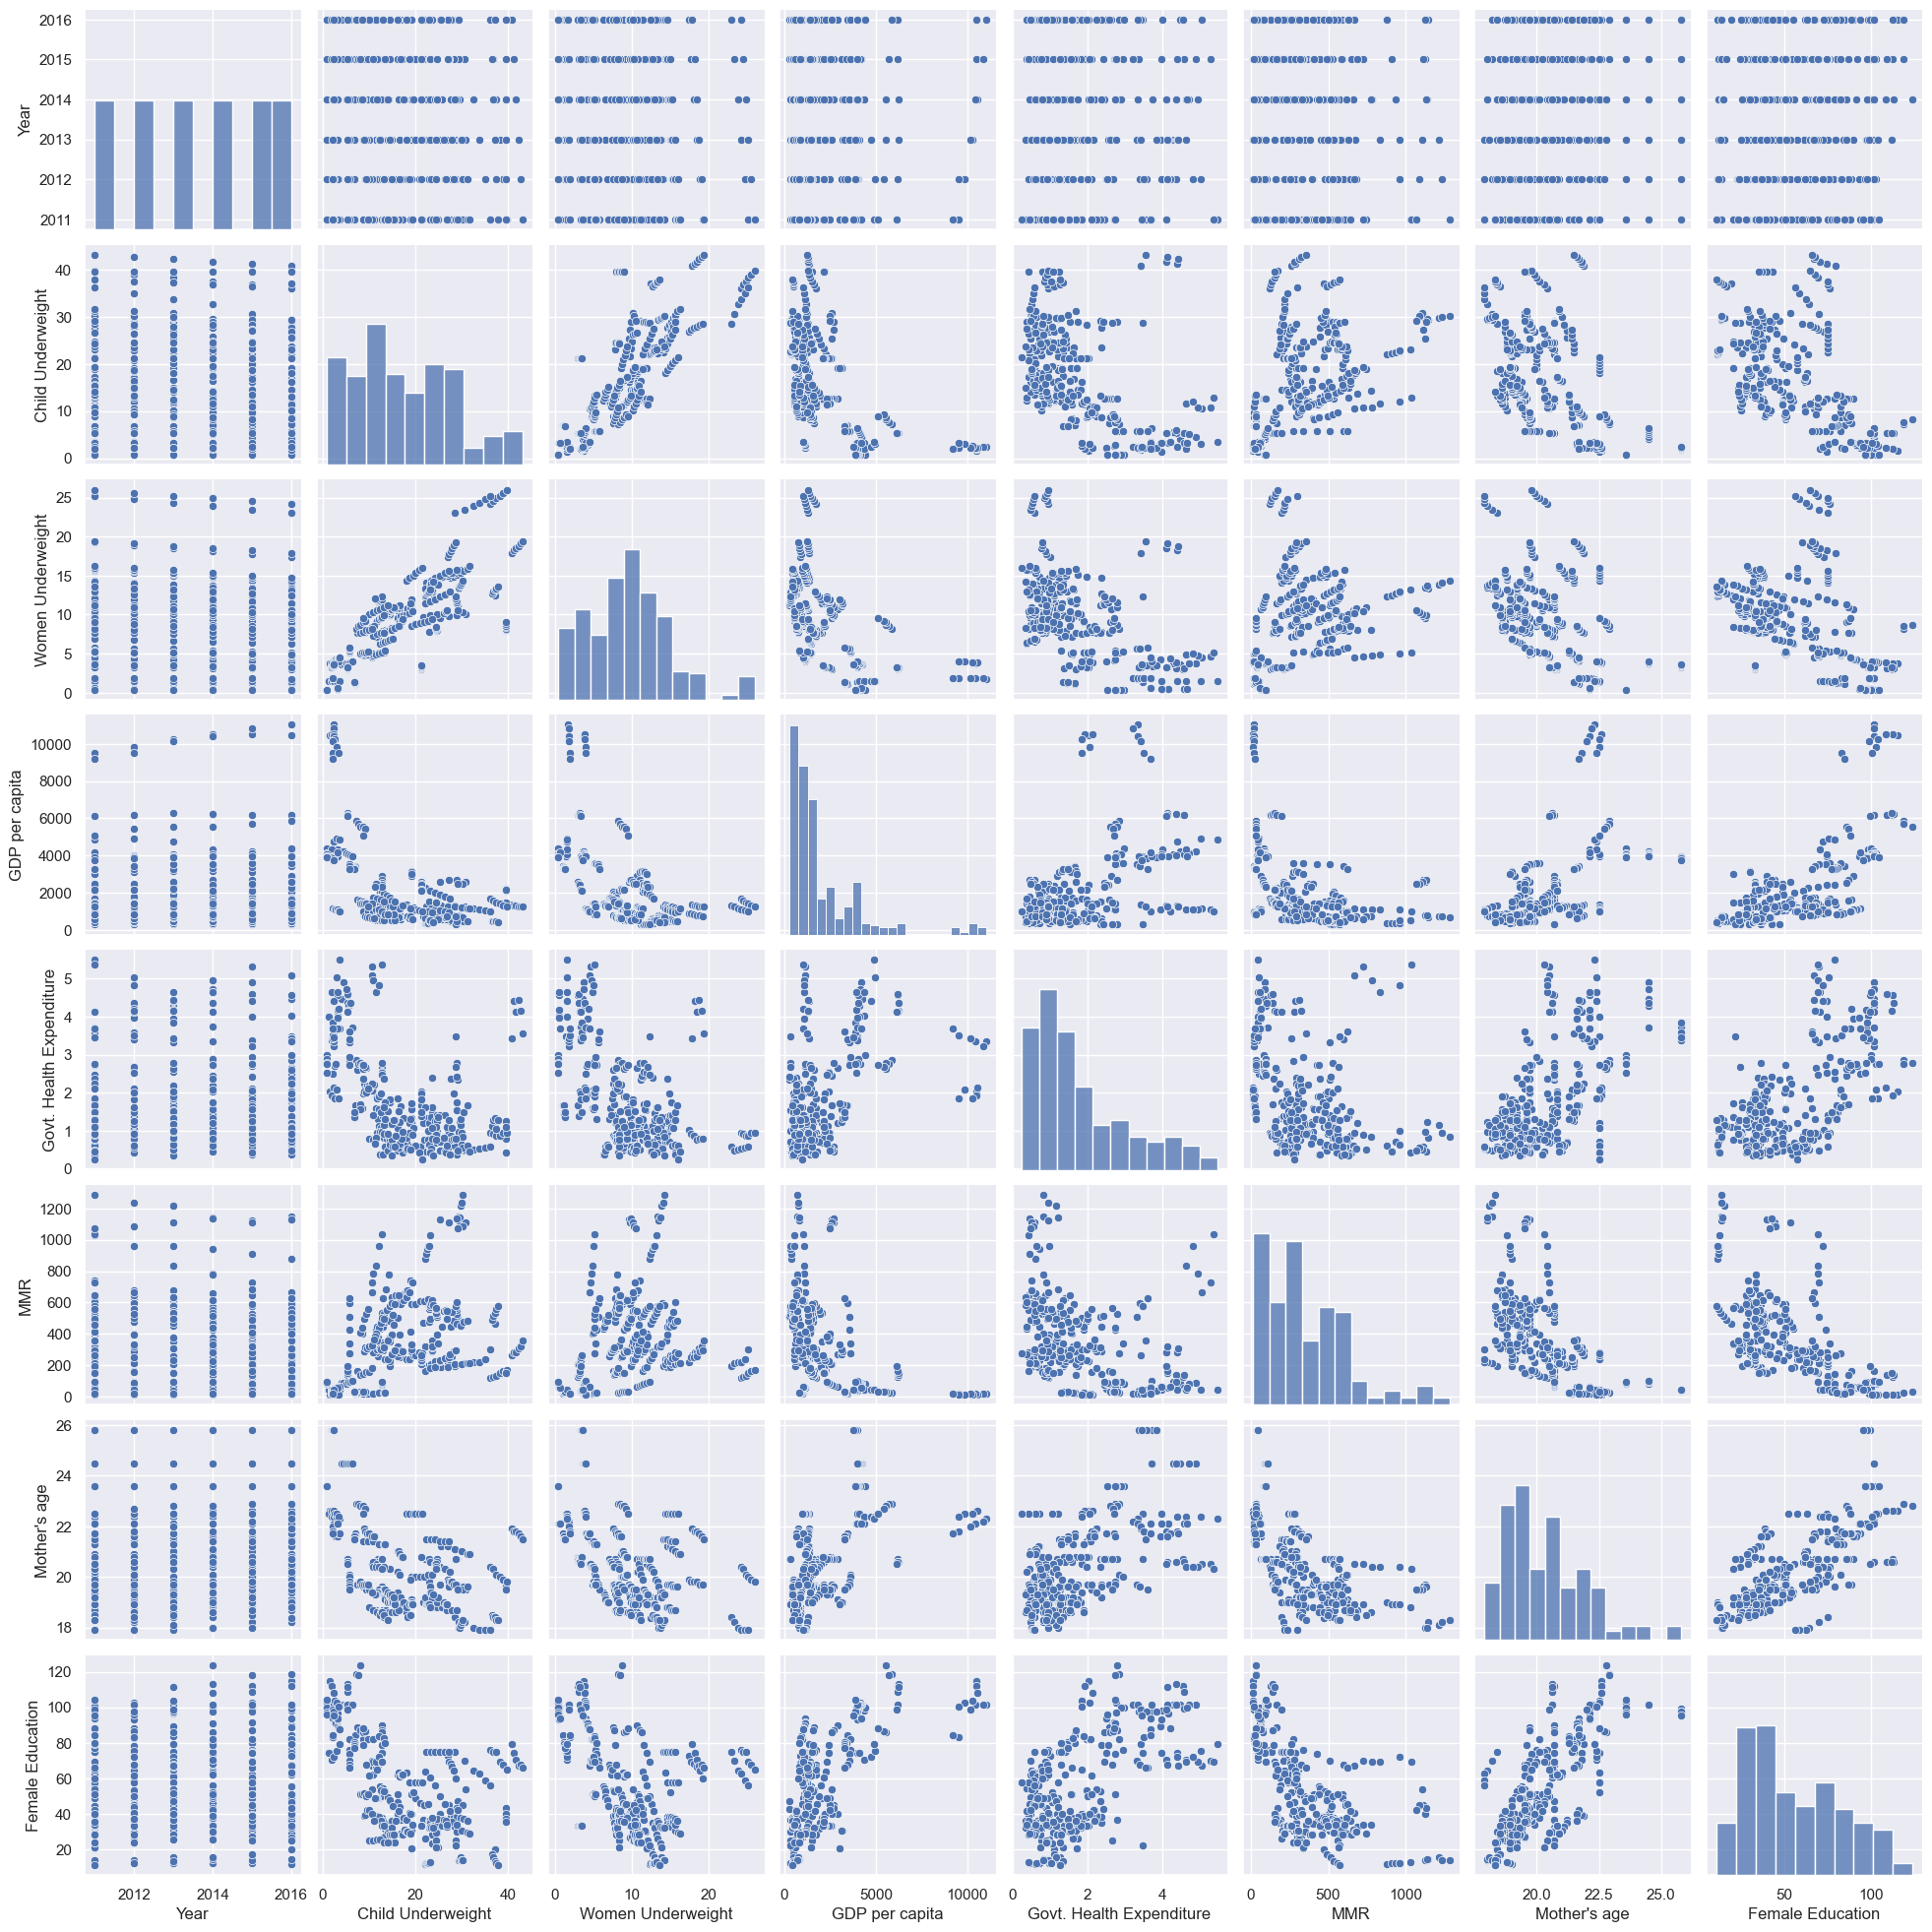

In [81]:
# Scatterplot between different variables

sns.pairplot(dfa)
plt.show()

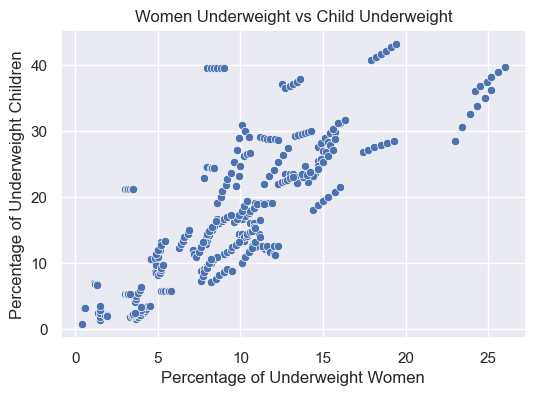

In [82]:
# Scatter plot between Child Underweight and Women Underweight

plt.figure(figsize = (6,4))
sns.scatterplot(data = dfa, x = 'Women Underweight', y = 'Child Underweight')
plt.title('Women Underweight vs Child Underweight')
plt.xlabel('Percentage of Underweight Women')
plt.ylabel('Percentage of Underweight Children')
plt.show()

> # **Observation:**

* It is clear that as undernutrition in women increases, undernutrition in children also increases
* Mother's health might be one of the most important determinants of child nutrition

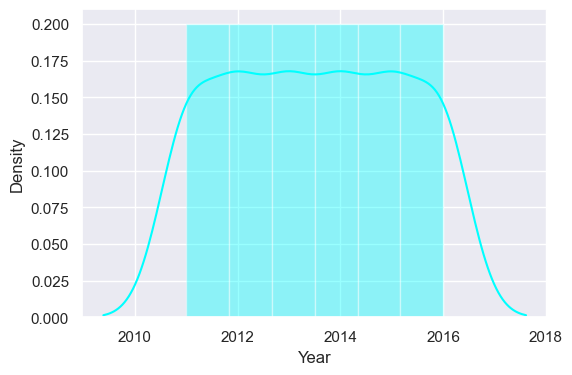

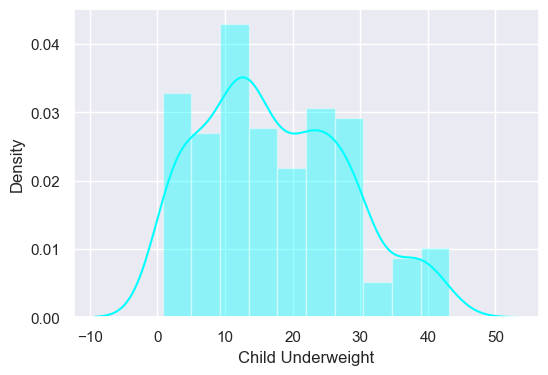

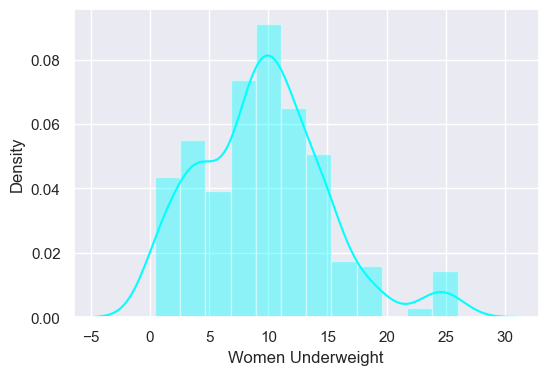

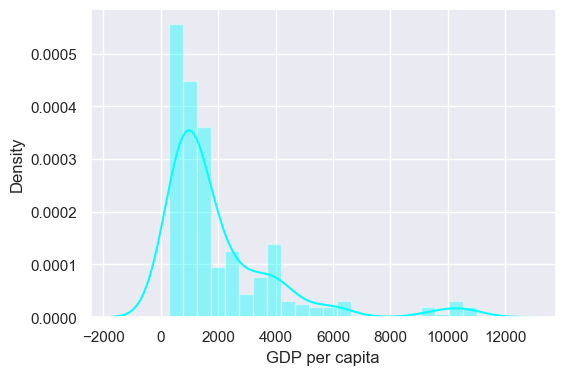

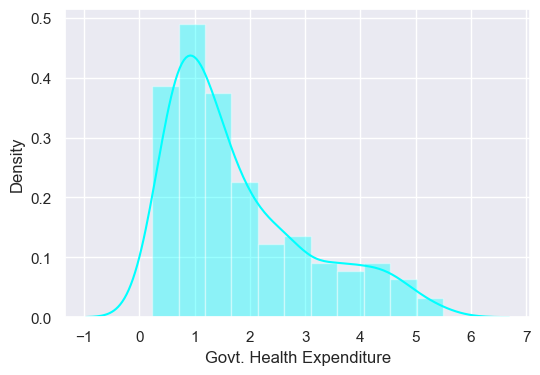

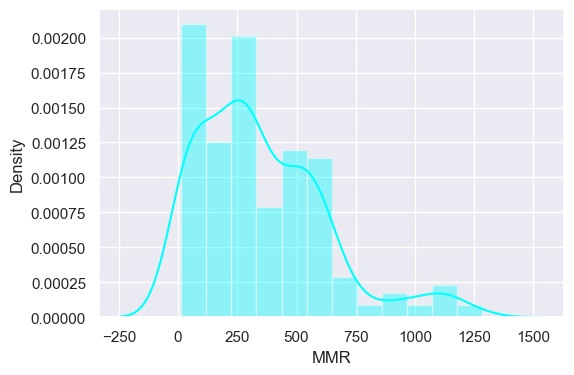

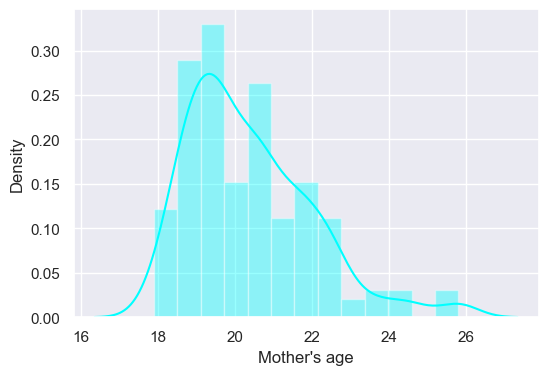

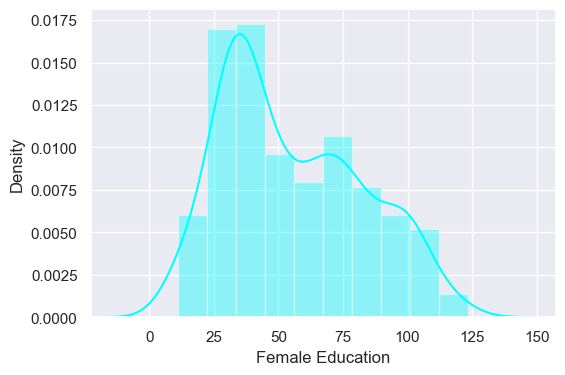

In [83]:
# Distribution of the variables

def distplot(col):
    plt.figure(figsize = (6,4))
    sns.distplot(dfa[col], color = 'aqua')
    plt.show()

for i in list(dfa.select_dtypes(exclude = ['object']).columns)[0:]:
    distplot(i)

> # **Observation:**

* Only Child Underweight and women underweight are somewhat normally distributed
* All the other variables are positively skewed

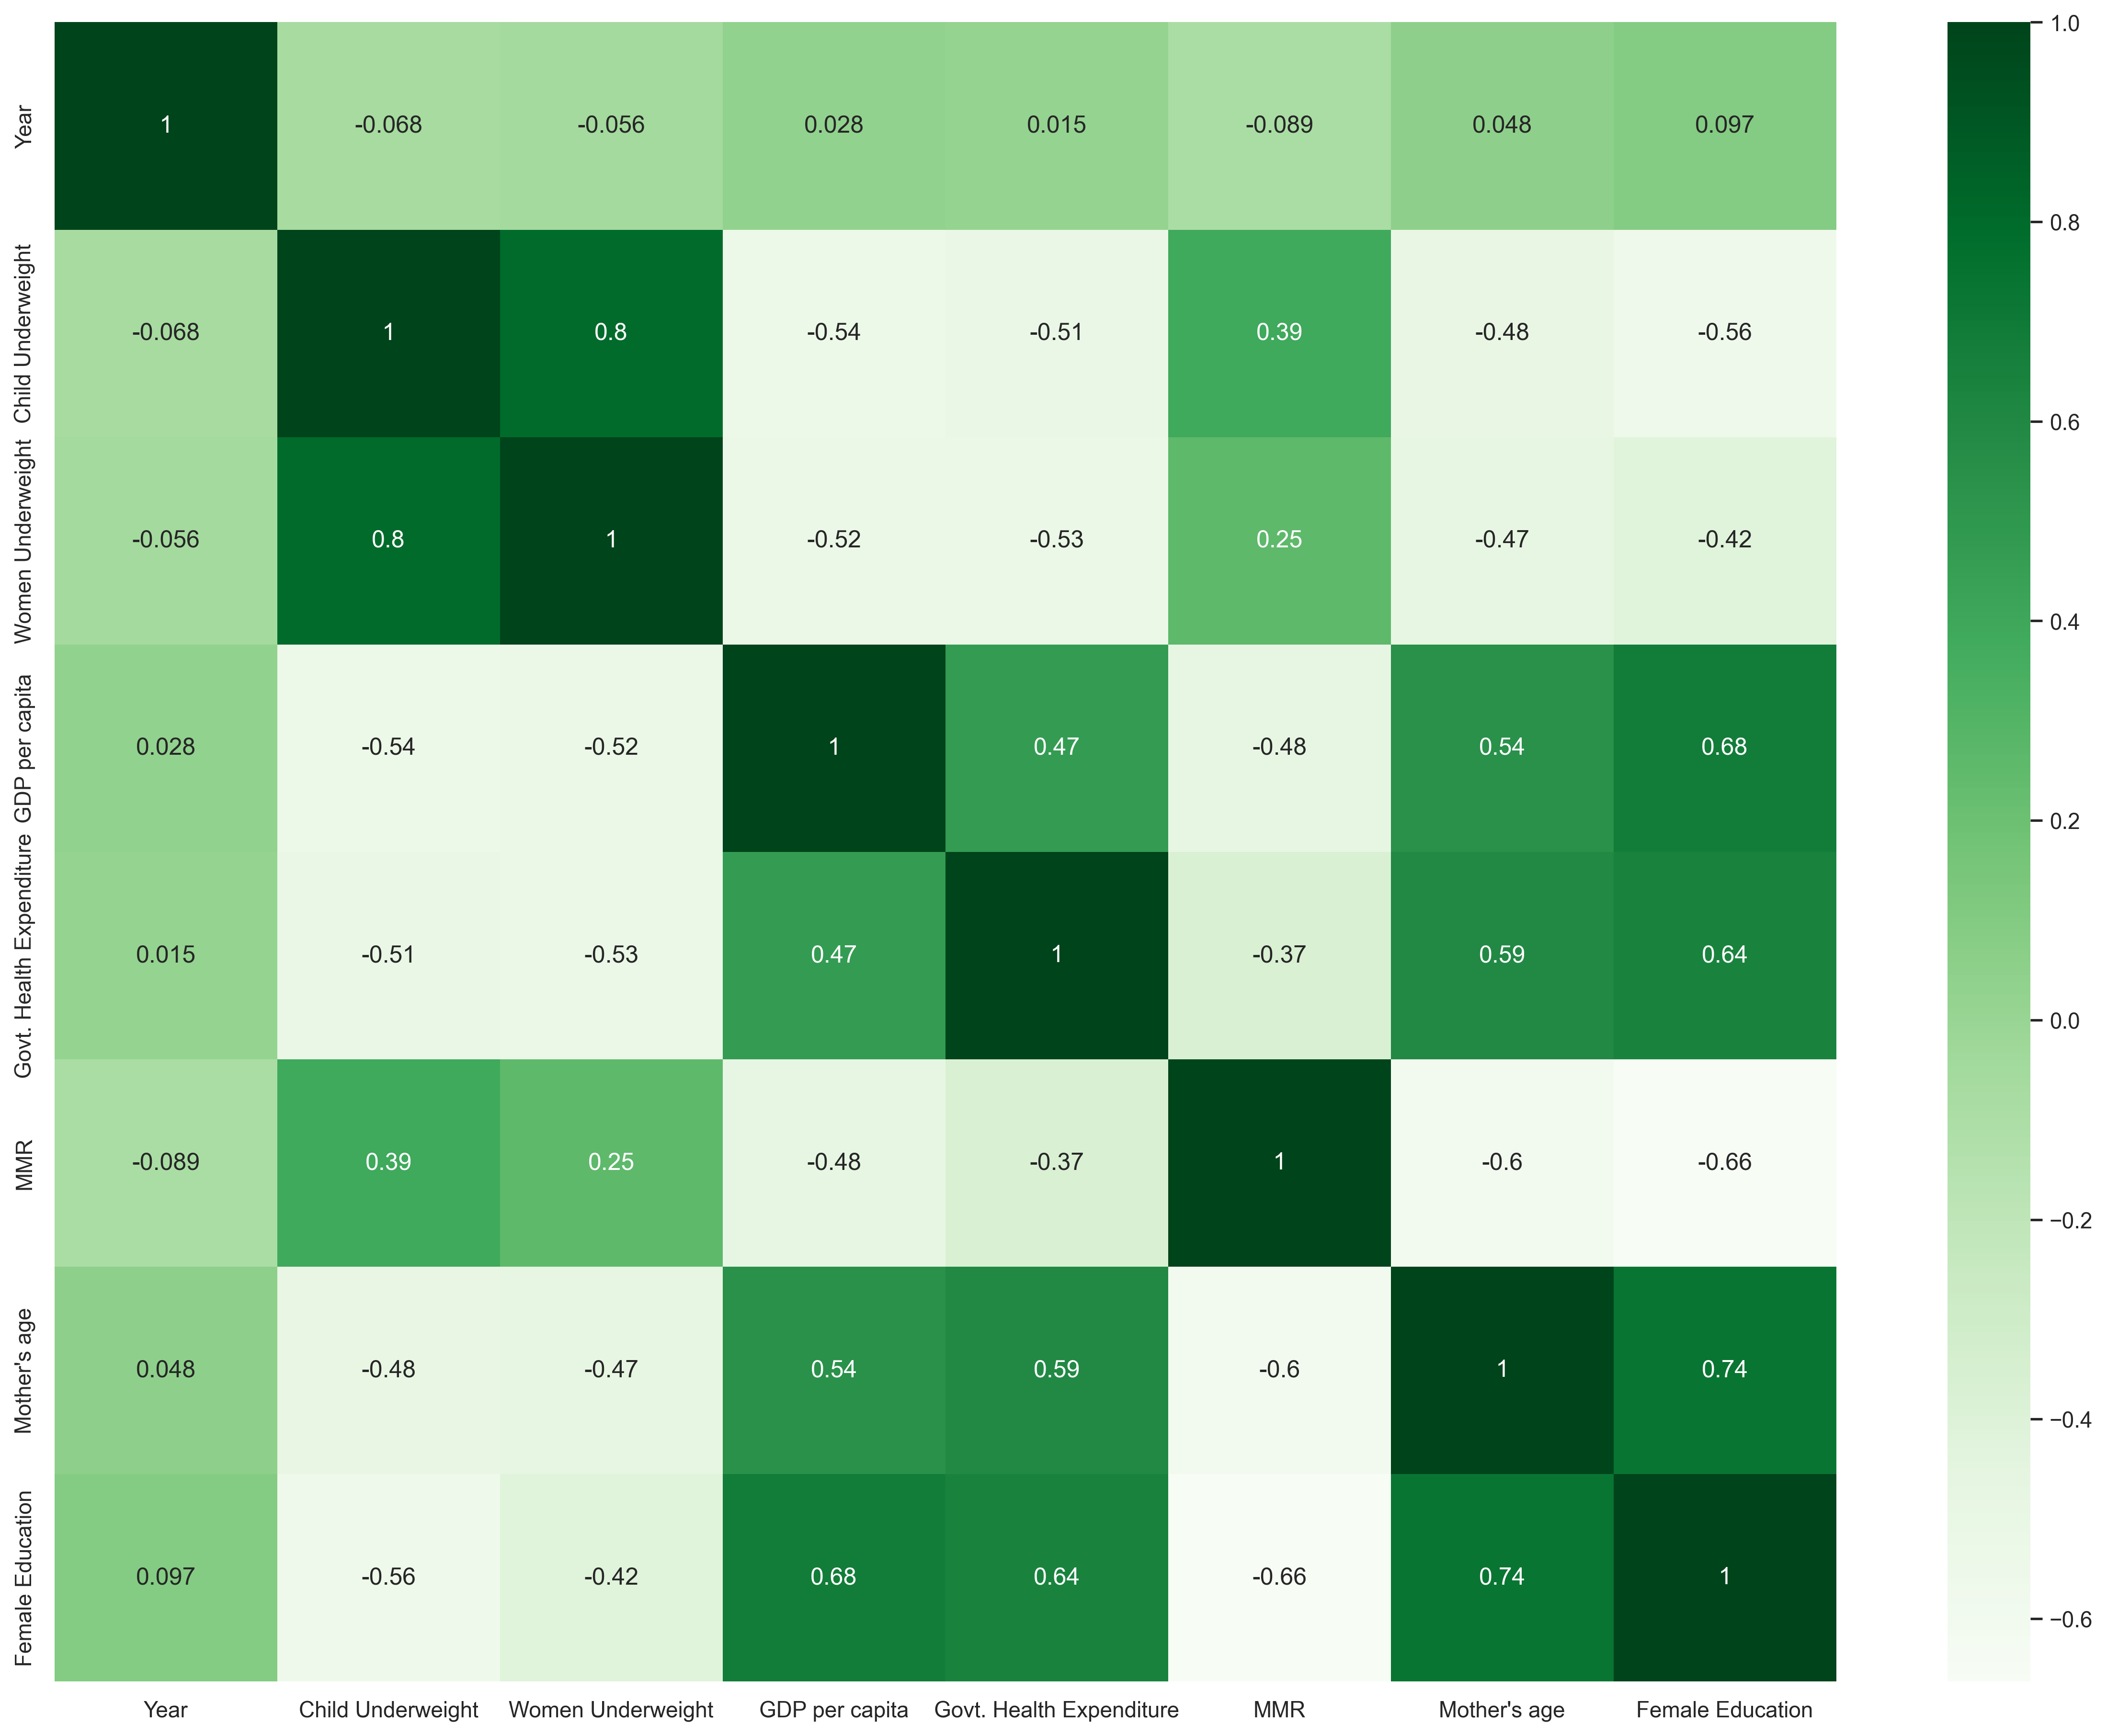

In [84]:
# Finding correlation

plt.figure(figsize = (20,15), dpi = 300)
corr = dfa.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)
plt.show()

> # [](http://)**Observation:**

The darker the colour, the higher the correlation

# Model 1: OLS Regression (with Constant)

In [85]:
dfb = dfa.copy()
dfb

,Country Name,Continent,Country Code,Year,Child Underweight,Women Underweight,GDP per capita,Govt. Health Expenditure,MMR,Mother's age,Female Education
0,Algeria,Africa,DZA,2016,4.09,3.6,4246.242160,4.472452,89.0,24.5,101.544517
1,Angola,Africa,AGO,2016,19.10,10.9,2914.412131,1.197537,270.0,19.1,39.741829
2,Bangladesh,Asia/Pacific,BGD,2016,28.50,23.0,1307.732333,0.569685,196.0,18.4,75.010811
3,Benin,Africa,BEN,2016,19.10,8.6,1045.150937,0.574913,590.0,20.0,50.731831
4,Bhutan,Asia/Pacific,BTN,2016,12.70,10.7,2889.493866,2.644663,66.0,20.7,89.734169
...,...,...,...,...,...,...,...,...,...,...,...
457,Tunisia,Africa,TUN,2011,2.42,3.6,3734.491283,3.454193,46.0,25.8,95.278748
458,Turkey,Asia/Pacific,TUR,2011,2.08,1.9,9207.513495,3.681827,23.0,21.7,84.496590
461,Uganda,Africa,UGA,2011,14.00,11.2,817.958451,0.908633,359.0,18.3,23.766609
465,Yemen,Asia/Pacific,YEM,2011,39.60,9.0,2159.845146,1.092118,155.0,19.5,35.637112


In [86]:
# Dividing the dataframe into dependent and independent variables

# Dependent Variable
y = dfb['Child Underweight']

# Independent Variable
x = dfb[['Women Underweight', 'GDP per capita', 'Govt. Health Expenditure', 'MMR', "Mother's age", 'Female Education']]

In [87]:
y

0       4.09
1      19.10
2      28.50
3      19.10
4      12.70
       ...  
457     2.42
458     2.08
461    14.00
465    39.60
467     9.70
Name: Child Underweight, Length: 324, dtype: float64

In [88]:
x

,Women Underweight,GDP per capita,Govt. Health Expenditure,MMR,Mother's age,Female Education
0,3.6,4246.242160,4.472452,89.0,24.5,101.544517
1,10.9,2914.412131,1.197537,270.0,19.1,39.741829
2,23.0,1307.732333,0.569685,196.0,18.4,75.010811
3,8.6,1045.150937,0.574913,590.0,20.0,50.731831
4,10.7,2889.493866,2.644663,66.0,20.7,89.734169
...,...,...,...,...,...,...
457,3.6,3734.491283,3.454193,46.0,25.8,95.278748
458,1.9,9207.513495,3.681827,23.0,21.7,84.496590
461,11.2,817.958451,0.908633,359.0,18.3,23.766609
465,9.0,2159.845146,1.092118,155.0,19.5,35.637112


In [90]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 2.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 4.0 MB/s eta 0:00:00a 0:00:01


In [91]:
# OLS Regression

import statsmodels.api as sm
x1 = sm.add_constant(x)
result = sm.OLS(y,x1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Child Underweight   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     130.4
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           1.63e-82
Time:                        15:00:34   Log-Likelihood:                -1024.1
No. Observations:                 324   AIC:                             2062.
Df Residuals:                     317   BIC:                             2089.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.9484      6.474     -1.073      0.284     -19.685       5.789
Women Underweight            1.4380      0.077     18.623      0.000       1.286       1.590
GDP per capita            8.985e-05      0.000      0.401      0.688      -0.000       0.001
Govt. Health Expenditure     0.2075      0.363      0.571      0.568      -0.507       0.922
MMR                          0.0034      0.002      2.085      0.038       0.000       0.007
Mother's age                 0.7615      0.319      2.384      0.018       0.133       1.390
Female Education            -0.1216      0.023     -5.246      0.000      -0.167      -0.076
==============================================================================
Omnibus:                      101.403   Durbin-Watson:                   2.382
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.167
Skew:                           1.443   Prob(JB):                     1.19e-62
Kurtosis:                       6.577   Cond. No.                     5.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observation:**

* Women underweight, Female Education, MMR and Mother's age are significant variables since their p value is less than 0.05
* R-Square = 0.71 suggests that overall fit of the model is decent

# Model 2: OLS Regression (without Constant)

In [92]:
result2 = sm.OLS(y,x).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Child Underweight   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                              618.4
Date:                Sun, 26 Nov 2023   Prob (F-statistic):                   5.11e-172
Time:                        15:00:34   Log-Likelihood:                         -1024.7
No. Observations:                 324   AIC:                                      2061.
Df Residuals:                     318   BIC:                                      2084.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Women Underweight            1.4090      0.072     19.472      0.000       1.267       1.551
GDP per capita            7.582e-05      0.000      0.339      0.735      -0.000       0.001
Govt. Health Expenditure     0.2553      0.361      0.708      0.480      -0.454       0.965
MMR                          0.0027      0.001      1.800      0.073      -0.000       0.006
Mother's age                 0.4310      0.085      5.081      0.000       0.264       0.598
Female Education            -0.1163      0.023     -5.134      0.000      -0.161      -0.072
==============================================================================
Omnibus:                       97.086   Durbin-Watson:                   2.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.806
Skew:                           1.404   Prob(JB):                     1.04e-56
Kurtosis:                       6.348   Cond. No.                     3.32e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Limitations:**


* In both of these models, the variables,"GDP per capita" and "Govt. Health Expenditure" both have positive coefficients which is counter-intuitive. This is because, ideally Child Undernutrition should decrease with increase in GDP and Health explenditure by government. This might be due to the choice of the Asia/Pacific and Africa Region where Percentage of Underweight Children does not necessarily decreases with increase in GDP per capita or Govt. Health Expenditure.

* Although, both models are decent, they suffer from multicollinearity issues as the condition number is large. So, we need to apply some other form of regression techniques to remove multicollinearity. Now, we will use machine learning methodologies to solve these problems'

**Observation:**

* R-Square improves significantly in this model
* However, MMR is now insignificant at 5% level of significance

# Model 3

In [93]:
# Dependent Variable
y = dfb['Child Underweight']

# Independent Variable
x2 = dfb[['Women Underweight', 'MMR', "Mother's age", 'Female Education']]

In [94]:
result3 = sm.OLS(y,x2).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Child Underweight   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                              931.6
Date:                Sun, 26 Nov 2023   Prob (F-statistic):                   7.34e-175
Time:                        15:00:34   Log-Likelihood:                         -1025.0
No. Observations:                 324   AIC:                                      2058.
Df Residuals:                     320   BIC:                                      2073.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Women Underweight     1.3824      0.062     22.187      0.000       1.260       1.505
MMR                   0.0027      0.001      1.858      0.064      -0.000       0.006
Mother's age          0.4478      0.082      5.482      0.000       0.287       0.609
Female Education     -0.1073      0.019     -5.750      0.000      -0.144      -0.071
==============================================================================
Omnibus:                       97.747   Durbin-Watson:                   2.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.661
Skew:                           1.416   Prob(JB):                     6.80e-57
Kurtosis:                       6.337   Cond. No.                         129.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation:**

* Here we can see, after dropping GDP per capita and Govt. health expenditure (We can drop them because they were not significant in the model), the overall performance of the model does not go down. Moreover, the multicollinearity problem is resolved now.
* All the variables except for Maternal Mortality Ratio are significant at 5% level.
* The overall fit of the model is very good.

In [95]:
dfb.head(10)

,Country Name,Continent,Country Code,Year,Child Underweight,Women Underweight,GDP per capita,Govt. Health Expenditure,MMR,Mother's age,Female Education
0,Algeria,Africa,DZA,2016,4.09,3.6,4246.242160,4.472452,89.0,24.5,101.544517
1,Angola,Africa,AGO,2016,19.10,10.9,2914.412131,1.197537,270.0,19.1,39.741829
2,Bangladesh,Asia/Pacific,BGD,2016,28.50,23.0,1307.732333,0.569685,196.0,18.4,75.010811
3,Benin,Africa,BEN,2016,19.10,8.6,1045.150937,0.574913,590.0,20.0,50.731831
4,Bhutan,Asia/Pacific,BTN,2016,12.70,10.7,2889.493866,2.644663,66.0,20.7,89.734169
5,Burkina Faso,Africa,BFA,2016,23.50,12.7,650.417261,2.386831,293.0,19.2,34.871910
6,Burundi,Africa,BDI,2016,29.10,11.2,282.975967,2.345776,508.0,20.7,47.356010
7,Cambodia,Asia/Pacific,KHM,2016,22.40,14.1,1235.323404,1.333815,197.0,21.5,75.000000
8,Cameroon,Africa,CMR,2016,12.30,6.3,1420.029872,0.365931,437.0,19.4,55.443081
9,Central African Republic CAR,Africa,CAF,2016,22.10,12.3,362.218331,0.599534,877.0,19.0,11.841000


In [96]:
# Assuming I have a new data point with values for the selected independent variables
new_data = {
    'Women Underweight': 14.1,
    'Female Education': 75,
    'MMR': 197.0,
    "Mother's age": 21.5
}

# Create a DataFrame from the new data
new_data_df = pd.DataFrame([new_data])

# Use the trained Random Forest model to make predictions
predicted_child_underweight = result3.predict(new_data_df[x2.columns])  # Use the same columns as during training

print(f'Predicted Child Underweight Percentage: {predicted_child_underweight[0]}')


Predicted Child Underweight Percentage: 21.612769554619952


## Random Forest Regression

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
result4=regressor.fit(x2,y)
y_pred = result4.predict(x2)
r2 = r2_score(y, y_pred)
print(f"R-squared value: {r2}")

feature_names = x2.columns
feature_importances = result4.feature_importances_

sorted_feature_indices = feature_importances.argsort()[::-1]

for index in sorted_feature_indices:
    print(f"{feature_names[index]}: {feature_importances[index]}")

R-squared value: 0.9909561806705218
Women Underweight: 0.6573057936353299
Female Education: 0.13680471196352442
MMR: 0.11438101388757396
Mother's age: 0.09150848051357179


In [98]:
# Assuming I have a new data point with values for the selected independent variables
new_data = {
    'Women Underweight': 15.0,
    'Female Education': 80,
    'MMR': 200.0,
    "Mother's age": 22.0
}

# Create a DataFrame from the new data
new_data_df = pd.DataFrame([new_data])

# Use the trained Random Forest model to make predictions
predicted_child_underweight = result4.predict(new_data_df[x2.columns])  # Use the same columns as during training

print(f'Predicted Child Underweight Percentage: {predicted_child_underweight[0]}')


Predicted Child Underweight Percentage: 24.204999999999995


## Ridge Regression

In [99]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(x2,y)

coefficients = pd.Series(ridge_model.coef_, index=x2.columns)

y_pred = ridge_model.predict(x2)
r2 = r2_score(y, y_pred)

print("Ridge Regression Coefficients:")
print(coefficients)

print(f"R-squared: {r2}")


Ridge Regression Coefficients:
Women Underweight    1.414363
MMR                  0.003501
Mother's age         0.787837
Female Education    -0.113299
dtype: float64
R-squared: 0.7112243317737201


In [100]:
# Assuming I have a new data point with values for the selected independent variables
new_data = {
    'Women Underweight': 15.0,
    'Female Education': 80,
    'MMR': 200.0,
    "Mother's age": 22.0
}

# Create a DataFrame from the new data
new_data_df = pd.DataFrame([new_data])

# Use the trained Random Forest model to make predictions
predicted_child_underweight = ridge_model.predict(new_data_df[x2.columns])  # Use the same columns as during training

print(f'Predicted Child Underweight Percentage: {predicted_child_underweight[0]}')


Predicted Child Underweight Percentage: 22.993610786369054


## Lasso Regression

In [101]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength)
lasso_model.fit(x2, y)

# Get coefficients
coefficients = pd.Series(lasso_model.coef_, index=x2.columns)

# Get the R-squared value
y_pred = lasso_model.predict(x2)
r2 = r2_score(y, y_pred)

# Model summary
print("Lasso Regression Coefficients:")
print(coefficients)

print(f"R-squared: {r2}")


Lasso Regression Coefficients:
Women Underweight    1.327997
MMR                  0.002628
Mother's age         0.000000
Female Education    -0.090115
dtype: float64
R-squared: 0.7051316961818643


In [102]:
# Assuming I have a new data point with values for the selected independent variables
new_data = {
    'Women Underweight': 15.0,
    'Female Education': 80,
    'MMR': 200.0,
    "Mother's age": 22.0
}

# Create a DataFrame from the new data
new_data_df = pd.DataFrame([new_data])

# Use the trained Random Forest model to make predictions
predicted_child_underweight = lasso_model.predict(new_data_df[x2.columns])  # Use the same columns as during training

print(f'Predicted Child Underweight Percentage: {predicted_child_underweight[0]}')


Predicted Child Underweight Percentage: 21.95777595588283


## Linear Boosting Regression

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x2, y)

# Calculate R-squared
y_pred = model.predict(x2)
r2 = 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)
print("R-squared:", r2)

feature_names = x2.columns
feature_importances = result4.feature_importances_

sorted_feature_indices = feature_importances.argsort()[::-1]

for index in sorted_feature_indices:
    print(f"{feature_names[index]}: {feature_importances[index]}")

R-squared: 0.9807900056448966
Women Underweight: 0.6573057936353299
Female Education: 0.13680471196352442
MMR: 0.11438101388757396
Mother's age: 0.09150848051357179


In [104]:
# Assuming I have a new data point with values for the selected independent variables
new_data = {
    'Women Underweight': 15.0,
    'Female Education': 80,
    'MMR': 200.0,
    "Mother's age": 22.0
}

# Create a DataFrame from the new data
new_data_df = pd.DataFrame([new_data])

# Use the trained Random Forest model to make predictions
predicted_child_underweight = model.predict(new_data_df[x2.columns])  # Use the same columns as during training

print(f'Predicted Child Underweight Percentage: {predicted_child_underweight[0]}')

Predicted Child Underweight Percentage: 26.11116291480361


## Support Vector Regression

In [105]:
from sklearn.svm import SVR

model = SVR()
model.fit(x2, y)

# Calculate R-squared
y_pred = model.predict(x2)
r2 = model.score(x2, y)
print("R-squared:", r2)

feature_names = x2.columns
feature_importances = result4.feature_importances_

sorted_feature_indices = feature_importances.argsort()[::-1]

for index in sorted_feature_indices:
    print(f"{feature_names[index]}: {feature_importances[index]}")

R-squared: 0.24106384795199498
Women Underweight: 0.6573057936353299
Female Education: 0.13680471196352442
MMR: 0.11438101388757396
Mother's age: 0.09150848051357179


In [106]:
# Assuming I have a new data point with values for the selected independent variables
new_data = {
    'Women Underweight': 15.0,
    'Female Education': 80,
    'MMR': 200.0,
    "Mother's age": 22.0
}

# Create a DataFrame from the new data
new_data_df = pd.DataFrame([new_data])

# Use the trained Random Forest model to make predictions
predicted_child_underweight = model.predict(new_data_df[x2.columns])  # Use the same columns as during training

print(f'Predicted Child Underweight Percentage: {predicted_child_underweight[0]}')

Predicted Child Underweight Percentage: 13.535269182349218


# Conclusion

**The best model is:**

*Child Underweight = 1.3716 x Women Underweight + 0.0028 x MMR + 0.4562 x Mother's Age - 0.1094 x Female Education*


The following measures are recommended to address child undernutrition in Cambodia:

1. **Enhancing Maternal Health and Postnatal Care**:

- Prioritize comprehensive maternal healthcare during pregnancy and the postpartum period.
- Ensure accessible and quality healthcare services for pregnant women, including regular check-ups and nutritional guidance.
- Implement programs that focus on maternal well-being, aiming to positively impact child nutrition outcomes.

2. **Promoting Female Education**:

- Advance initiatives that empower women through education, providing them with the knowledge and skills needed to make informed decisions.
- Establish educational programs that specifically address maternal and child health, emphasizing the importance of proper nutrition during pregnancy and early childhood.
- Encourage community involvement to create a supportive environment for female education.

3. **Advocating Appropriate Timing for Motherhood**:

- Launch awareness campaigns highlighting the significance of planning and delaying childbirth until reaching a suitable life stage.
- Provide accessible family planning resources and services to help women make informed choices about the timing of motherhood.
- Collaborate with community leaders, healthcare providers, and educators to foster a culture that values responsible family planning.

4. **Community Engagement and Collaboration**:

- Foster partnerships between government agencies, non-profit organizations, and local communities to implement and sustain these initiatives.
- Encourage community involvement in decision-making processes related to maternal and child health.
- Establish support networks that connect women with resources and information, creating a collaborative effort to combat child undernutrition.

5. **Monitoring and Evaluation**:

- Implement a robust monitoring and evaluation system to assess the effectiveness of the implemented measures.
- Regularly collect and analyze data on maternal health, female education, and childbirth trends to identify areas for improvement.
- Use feedback from communities and healthcare providers to adapt and refine strategies over time.

By implementing these comprehensive policies and engaging with communities, Cambodia can take meaningful steps toward eradicating child undernutrition. These measures not only address immediate health concerns but also contribute to the long-term well-being of both current and future generations.

# Thank You!